# **Flight Price Prediction DataSet**

[Kaggle](https://www.kaggle.com/datasets/jillanisofttech/flight-price-prediction-dataset)

[Ref Notebook - 1](https://www.kaggle.com/code/burakergene/predict-fare-of-airlines-tickets-w-detailed-eda-rf)

[Ref Notebook - 2](https://www.kaggle.com/code/alwanadiuntoro/flight-price-linear-and-polynomial-regression)

# INTRODUCTION
The objective of the study is to analyze the flight booking dataset obtained from the “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

# Context:
Predicting the Fare of the flight has never been an easy task.

# Content:
What's inside is more than just rows and columns. Here we have got some collections including the destination to Route, meal included, and much more

# Acknowledgments
Try exploring different algorithms and improve the accuracy

# Flight Price Linear and Polynomial Regression
[NoteBook](https://www.kaggle.com/code/alwanadiuntoro/flight-price-linear-and-polynomial-regression)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Merge Dataset

In [3]:
train_df = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/CLassic_ML/Data Preprocessing/FlightPricePrediction/data/Data_Train.xlsx')

In [4]:
train_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
test_df = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/CLassic_ML/Data Preprocessing/FlightPricePrediction/data/Test_set.xlsx')

In [6]:
test_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## Get Info

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


**🎯 Observation 1: Data Types - The Red Flags**

What You See:

* 10 columns are 'object' (text/string)
* Only 1 column is numeric (Price - int64) <br><br>


**🎯 Observation 2: Missing Values - The Pattern**

What You See:

* Most columns: 10,683 non-null (complete)
* Route: 10,682 non-null (1 missing)
* Total_Stops: 10,682 non-null (1 missing) <br><br>

**🎯 Observation 3: Memory Usage**

What You See:

918.2 KB for ~10k rows

**What This Means:**

✅ Small dataset - you can:

- Load entire dataset in memory easily
- Try computationally expensive feature engineering
- Use cross-validation extensively without memory issues
- Experiment freely without worrying about RAM

*💡 Key Insight:*

This is a beginner-friendly size. You won't need distributed computing, sampling, or memory optimization tricks. Focus on feature engineering and model quality!

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


## Merge The dataset

In [9]:
train_df['is_train'] = 1
test_df['is_train'] = 0

In [10]:
train_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,is_train
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [11]:
test_df['Price'] = np.nan  # Add target column in test data to match the train data before concating

In [12]:
test_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,is_train,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,0,NaN
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,0,NaN
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,0,NaN
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,0,NaN
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,0,NaN


In [13]:
# Combine the dataset into one
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,is_train
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  is_train         13354 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 1.2+ MB


In [16]:
df.shape # rows and columns

(13354, 12)

In [17]:
df.describe()

,Price,is_train
count,10683.000000,13354.000000
mean,9087.064121,0.799985
std,4611.359167,0.400026
min,1759.000000,0.000000
25%,5277.000000,1.000000
50%,8372.000000,1.000000
75%,12373.000000,1.000000
max,79512.000000,1.000000


Count: 10,683<br>
What it means:<br>
- Only 10,683 values (not 13,354 total rows)
- Why? Test set has NaN for Price (as expected!)

✅ Verification: 13,354 - 10,683 = 2,671 (exactly your test set size)<br><br>

---

Mean: ₹9,087 (assuming Indian Rupees)<br>
What it means:<br>
- Average flight price is around ₹9,087
- This is your baseline prediction - if you predicted this for every flight, what would your error be?

---

Std (Standard Deviation): ₹4,611<br>
What it means:<br>
- Prices vary widely - typical deviation from mean is ₹4,611
- High variability = ₹4,611 relative to mean ₹9,087
- Coefficient of Variation = 4,611/9,087 = 0.51 (51%)

What this tells you:<br>
🎯 Moderate to high variance in prices<br>
- Not all flights cost the same (obviously!)
- Your model needs to learn WHAT drives these differences
- Features like Airline, Stops, Duration will be crucial

---

Min: ₹1,759<br>
What it means:<br>
- Cheapest flight in dataset
- Likely: budget airline, short route, many stops, inconvenient time

Kaggle thinking:<br>
`ratio = min/mean = 1,759/9,087 = 0.19`

- Min is only 19% of mean - that's a 5x difference!
- Your model needs to handle this range

---


25th Percentile (Q1): ₹5,277<br>
What it means:<br>

- 25% of flights cost ≤ ₹5,277
- These are the budget segment<br>

Insight:<br>

- Gap from min (1,759) to Q1 (5,277) = ₹3,518
- Quarter of flights are significantly cheaper than average

---

50th Percentile (Median): ₹8,372<br>
What it means:<br>

- Half of flights cost ≤ ₹8,372
- This is the typical flight price

🚨 CRITICAL OBSERVATION:<br>
Compare median (8,372) to mean (9,087):
`Median < Mean by ₹715`


What this reveals:<br>
📈 Right-skewed distribution!

```
Visual representation:

Cheaper ←——————|————→ Expensive
        Most flights here
        (median = 8,372)
                    ↑
                 Mean pulled right
                  (9,087)
                         Few expensive outliers →
```

Why this matters for Kaggle:<br>

1. Distribution is NOT normal - simple linear regression assumptions violated
2. Outliers on the high end - few very expensive flights pull mean up
3. Model choice: Tree-based models (XGBoost, Random Forest) handle skew better than linear models
4. Potential transformation: Log(Price) might normalize distribution

---

75th Percentile (Q3): ₹12,373<br>
What it means:<br>

- 75% of flights cost ≤ ₹12,373
- These are premium segment and above

Insight:

- Interquartile Range (IQR) = Q3 - Q1 = 12,373 - 5,277 = ₹7,096
- Middle 50% of prices span ₹7,096
- This is where most of your model's work happens!

---


Max: ₹79,512 🚨<br>
What it means:

- Most expensive flight

🔥 HUGE RED FLAG:<br>
Compare to other values:<br>
```
Max/Mean = 79,512/9,087 = 8.75x the average!
Max/Median = 79,512/8,372 = 9.5x the median!
Max vs Q3 = 79,512/12,373 = 6.4x the 75th percentile!
```
This screams:<br>
⚠️ OUTLIER ALERT!<br>
Questions a Grandmaster asks:<br>
❓ Is this a data error? (Typo, wrong currency?)<br>
❓ Is this real? (International business class, premium airline?)<br>
❓ How many flights are this expensive? (Just 1 or a cluster?)<br>

What to do:

1. Investigate: Look at this row's features
2. Check for more: How many flights > ₹50,000?
3. Decide strategy:
    - Keep them? (Real data, model should learn)
    - Cap them? (Winsorize to 99th percentile)
    - Remove them? (If proven errors)



Kaggle impact:

- Outliers can hurt model training (especially linear models)
- Or they're legitimate signal (premium features)
- This decision affects your leaderboard score!


# Your First EDA Assignment (No Code Yet)

I want you to think, not compute.

Answer these before touching code:

1. Which 3 features do you expect to be most predictive of fare?<br>




2. Which feature could cause data leakage?<br>
Having price in training data can cause data leak

3. Do you expect fare to be normally distributed? Why or why not?<br>
looking at .describe() i feel it is, i am not fully sure


4. Would time (date of journey) matter? How?<br>
I strongly feel yes, if there is holiday going on it will effect the price


5. Why might linear regression struggle here?<br>
I feel there is more than one feature that is effecting the price of the flight

# Data leakage

Data leakage is when information from outside the training dataset is used to create the model. This additional information can allow the model to learn or know something that it otherwise would not know and in turn invalidate the estimated performance of the mode being constructed.

# Missing Data

### Step 1: First principle (very important)

👉 Missing data is information, not just a problem.

The reason a value is missing often matters more than the value itself.

Before “fixing” missing values, we must understand why they are missing.

---

### Step 2: Types of missingness (conceptual clarity)

This classification is gold for interviews and real ML.

<br>

1️⃣ **MCAR — Missing Completely At Random**

Missing has nothing to do with data.

Example:

Random packet loss

Random logging failure

👉 Safe to drop or impute.

<br>

2️⃣ **MAR — Missing At Random**

Missing depends on other features, but not the target.

Example:

Income missing more often for younger people

Education missing for certain job types

👉 Imputation works well if done carefully.

<br>

3️⃣ **MNAR — Missing Not At Random (most dangerous)**

Missing depends on the value itself.

Example:

People with very low income skip income field

High-risk patients avoid medical tests

👉 Missingness itself is a strong signal.

<br>

**Interview line**:

“Understanding whether data is MCAR, MAR, or MNAR helps decide whether simple imputation is safe or whether missingness itself should be modeled.”

### Step 3: Core strategies for handling missing values


1️⃣ **Drop rows (when it’s safe)**

When to use

* Very small % missing (e.g., <1–2%)

* Data is MCAR

* Dataset is large

Why risky

* You lose data

* Can introduce bias if missing is systematic

`df.dropna()`


🚨 Never drop blindly.

---

2️⃣ **Drop columns (feature removal)**

When to use

- Feature has very high missing rate (e.g., >40–50%)

- Feature is weak or redundant

- Business says feature is unreliable

Interview tip:

“Dropping features is sometimes safer than aggressive imputation that injects noise.”

---

3️⃣ **Simple statistical imputation (baseline)**

Numerical features

* Mean

* Median (more robust)



```
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
```



Categorical features

* Mode

* Constant like "Unknown"
```
SimpleImputer(strategy="most_frequent")
```

Intuition

You’re saying:

> “Missing values behave like a typical case.”

Works well for MCAR / MAR, but fails for MNAR.

---

4️⃣ **Add a “missing indicator” (VERY IMPORTANT)**


```
Example:

df["income_missing"] = df["income"].isna().astype(int)
```

Why?

- Missingness itself may carry signal

- Helps model learn patterns like:

> “If income is missing, risk is higher”

This is best practice in many production systems.

---


5️⃣ **Model-based imputation (smarter, but risky)**

Examples:

- KNN imputation

- Regression imputation

- Iterative imputer (MICE)

```
from sklearn.impute import KNNImputer
```

When to use

- Strong correlations between features

- Enough data

- Careful pipeline control

🚨 Leakage risk

- Must fit imputer on train only

- Never on full dataset

---

6️⃣ **Domain-specific imputation (best in real life)**

Examples:

- Missing sensor value → forward fill

- Missing transaction count → 0

- Missing medical test → “not performed”

This often beats fancy ML.

---

# Step 4: Missing values + time series (special case)

In time series:

- Forward fill

- Backward fill

- Interpolation

```
df.fillna(method="ffill")
```

🚨 But:

* Forward fill uses past only

* Never use future values

---


### Interview-ready answer (structured)

“Handling missing values depends on why the data is missing. First, I assess whether the missingness is MCAR, MAR, or MNAR. Simple strategies include dropping rows or columns when missingness is minimal, or using statistical imputation like median for numerical and mode for categorical features. In many real-world cases, missingness itself is informative, so I add missing indicators. For more complex cases, model-based imputation can be used carefully, ensuring it’s fit only on training data to avoid leakage. The key is to align the strategy with data distribution, domain knowledge, and production constraints.”

---

### Recap (anchor this)

- Missing data ≠ noise, it’s a signal

- Understand why before fixing

- Start simple, add indicators

- Beware of leakage

- Pipelines matter

# Impute

### Step 1: What does impute mean? (Plain English)

👉 To impute means: to fill in a missing value using a reasonable guess.

That’s it.

In ML terms:

> Imputation = replacing missing data with a substituted value.

You are not recovering the true value — you are making a controlled approximation so the model can work.

---

### Step 2: Why do we even need imputation?

Most ML models cannot handle missing values:

* Linear / Logistic Regression ❌

* SVM ❌

* KNN ❌

* Neural Networks ❌

(Some tree-based models can, but even then, control is better.)

So we impute because:

> “The model needs numbers, not blanks.”

---

### Step 3: Common types of imputation (intuition first)

1️⃣ **Mean / Median Imputation (most common)**

If income is missing:

Mean imputation → “Use average income”

Median imputation → “Use typical income”

`SimpleImputer(strategy="median")`


📌 Why median is often better

* Robust to outliers

* Income, prices are skewed

<br>

2️⃣ **Mode / Constant Imputation (categorical)**

If “city” is missing:

* Mode → most common city

* Constant → "Unknown"

`SimpleImputer(strategy="most_frequent")`

<br>

3️⃣ **Zero Imputation (only when logical)**

Example:

* Missing num_transactions → 0

* Missing count_of_logins → 0

⚠️ Only valid if zero is meaningful.

---

### Step 4: Missing indicator (important concept)

Sometimes the fact that data is missing is more informative than the value itself.

So we add:

`is_missing = 1 if value is missing else 0`


This allows the model to learn patterns like:

> “Users who didn’t report income behave differently.”

This is still imputation — but smart imputation.

---

### Step 5: Model-based imputation (advanced)

Here, we predict the missing value using other features.

Example:

* Predict missing income using age, job, education

Methods:

* KNN imputer

* Regression imputer

* Iterative imputer (MICE)

These are more accurate but:

* More complex

* Higher leakage risk

* Slower

---

### Step 5: Critical clarification (VERY IMPORTANT)

❌ Imputation does NOT mean guessing the true value

✔️ It means:

> “Choosing a replacement that helps the model learn patterns without biasing results too much.”

The goal is better prediction, not perfect data recovery.

---

### Step 7: How to explain “imputation” in interviews (clean answer)

“Imputation is the process of replacing missing values with statistically or logically derived values so that machine learning models can process the data. The choice of imputation strategy depends on why the data is missing, the feature type, and the downstream model, and it must be done carefully to avoid introducing bias or data leakage.”

---

### Recap (lock it in)

* Impute = fill missing values

* It’s a controlled approximation

* Many strategies exist

* Missingness itself can be informative

* Always impute inside a proper pipeline

In [18]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,is_train
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1


### Deal with Missing Value
First thing first, we deal with missing value. There are several way to treat missing value. They are:

- MCAR (Missing Completely At Random)
- MAR (Missing At Random)
- MNAR (Missing Not At Random)

In [19]:
df.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,is_train
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,False,False,False,False,False,False,False,False,False,False,True,False
13350,False,False,False,False,False,False,False,False,False,False,True,False
13351,False,False,False,False,False,False,False,False,False,False,True,False
13352,False,False,False,False,False,False,False,False,False,False,True,False


In [20]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [21]:
display(df[df['Route'].isnull()])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,is_train
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0,1


In [22]:
display(df[df['Total_Stops'].isnull()])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,is_train
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0,1


**Look at your row carefully (this is key)**


```
Route       = NaN
Total_Stops= NaN
```




Now ask this critical question:

👉 Are Route and Total_Stops independent of each other in reality?

Answer: ❌ No

They are strongly dependent.

- Route literally defines the number of stops

- Total_Stops is derived from Route

So when both are missing in the same row, this is already a red flag 🚨.

- Route is missing ❌

- Total_Stops is missing ❌

- In the same record

- For a specific flight instance

That suggests:

> Something about this record caused both to be missing

That is systematic, not random.

This means:

> Missingness depends on other features (like is_train, airline, or route format)

**📌 That fits MAR.**

---

You have 3 sensible options:

**Option 1: Drop the row (best here)**

- Only 1 row

- No pattern learning needed

- Safest, simplest

`df = df.dropna(subset=["Route", "Total_Stops"]`)

**Option 2: Impute logically**

* Route: cannot safely impute

* Total_Stops: could infer from Duration, but risky

Not worth it for 1 row.

**Option 3: Remove those columns for this row only**

Equivalent to dropping the row for modeling. - but column hold good information


In [23]:
df.dropna(subset=["Route", "Total_Stops"], inplace=True)

In [24]:
display(df.isnull().sum())

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


# Duplicate Rows

## Duplicate Rows

Duplicate rows occur when two or more rows in your dataset are identical across all (or a subset of) columns. These can arise from data entry errors, data merging issues, or simply when a dataset is created from multiple sources.

### Why are duplicate rows a problem?

*   **Bias**: They can artificially inflate the importance of certain observations or patterns.
*   **Misleading Statistics**: Descriptive statistics (mean, median, etc.) can be distorted.
*   **Model Performance**: Machine learning models might learn redundant information, leading to overfitting or incorrect feature importance.

### How to handle duplicate rows in Pandas:

1.  **Identify Duplicates**: Use the `.duplicated()` method to return a boolean Series indicating whether each row is a duplicate of a previous row. You can specify `subset` to check for duplicates based on specific columns, and `keep` to control which duplicate (first, last, or all) is marked as `True`.

    *   `df.duplicated()`: Checks for duplicates across all columns.
    *   `df.duplicated(subset=['col1', 'col2'])`: Checks for duplicates based on 'col1' and 'col2'.
    *   `df.duplicated(keep=False)`: Marks all duplicates as `True`.

2.  **Remove Duplicates**: Use the `.drop_duplicates()` method to remove duplicate rows. This method also accepts `subset` and `keep` parameters, similar to `.duplicated()`.

    *   `df.drop_duplicates()`: Removes duplicates, keeping the first occurrence.
    *   `df.drop_duplicates(inplace=True)`: Removes duplicates directly from the DataFrame.


In [25]:
df.duplicated().sum()

np.int64(246)

In [26]:
all_duplicates = df[df.duplicated(keep=False)]
all_duplicates

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,is_train
33,Jet Airways,15/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 16 Jun,22h,2 stops,In-flight meal not included,10919.0,1
49,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150.0,1
73,Jet Airways,24/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 25 Jun,13h 30m,2 stops,No info,12819.0,1
81,Jet Airways,24/03/2019,Banglore,New Delhi,BLR → DEL,19:55,22:35,2h 40m,non-stop,No info,7229.0,1
87,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,04:25 07 Jun,18h 45m,2 stops,No info,13014.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13219,Air India,3/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 04 Jun,21h 15m,2 stops,No info,NaN,0
13236,Jet Airways,15/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,19:00,13h 30m,2 stops,No info,NaN,0
13243,Multiple carriers,3/06/2019,Delhi,Cochin,DEL → BOM → COK,13:00,01:30 04 Jun,12h 30m,1 stop,No info,NaN,0
13265,Air India,12/05/2019,Kolkata,Banglore,CCU → BOM → GOI → BLR,16:50,05:35 13 May,12h 45m,2 stops,No info,NaN,0


If even one column differs, they are not duplicates.

> Only remove duplicates when all feature values AND the target are identical.

Everything else stays.

# Unique Vals

In [27]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [28]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [29]:
zero_duration_rows = df[df['Duration'] == '0']
zero_duration_rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,is_train


In [30]:
zero_duration_rows = df[df['Duration'] == '0']
if not zero_duration_rows.empty:
    print(f"Found {len(zero_duration_rows)} rows with '0' duration:")
    display(zero_duration_rows)
else:
    print("No rows found with '0' duration.")

No rows found with '0' duration.


# 🧩 Feature Engineering (In the Right Order)

We will:

* Decide target transformation (log or not)

* Engineer time features

* Encode categoricals intelligently

* Create interaction features

In [31]:
# Data is in this format: 15/06/2019

# We can convert to day month year format

df['Day'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [32]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,is_train,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,1,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,01,03,2019


In [33]:
df.drop(columns=['Date_of_Journey'], inplace=True)

In [34]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,is_train,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,1,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,01,03,2019


In [35]:
df['Year'].unique()

array(['2019'], dtype=object)

In [36]:
df['Month'].unique()

array(['03', '05', '06', '04'], dtype=object)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13353 non-null  object 
 5   Arrival_Time     13353 non-null  object 
 6   Duration         13353 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13353 non-null  object 
 9   Price            10682 non-null  float64
 10  is_train         13353 non-null  int64  
 11  Day              13353 non-null  object 
 12  Month            13353 non-null  object 
 13  Year             13353 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.0+ MB


## Since the year is all 2019 - we can drop

You observed:

> All rows have Year = 2019

That means:

- Zero variance

- No ability to split data

- No explanatory power

From an ML perspective:

- A constant feature cannot explain variation in the target

- Models will ignore it or waste capacity on it

🧠 Kaggle rule:

> Features with zero variance are useless.

---

### When Year SHOULD be kept:

- Multiple years present

- Long-term trend exists

- Inflation or seasonality across years

Here:

- Single year → no temporal trend

- All variation is within-

---

Even though Year is useless, time still matters.

Extract value from:

- Month

- Day of week

- Day of month

- Is weekend

- Holiday proxy (optional)

🧠 Kaggle insight:

> Raw time fields are rarely useful — derived time features are gold.

---

5️⃣ Kaggle-Grade Decision Rule (Memorize This)

- If a feature has zero variance, drop it.
- If a feature has low variance, question it.
- If a feature has high variance, inspect it.

In [38]:
df.drop(columns=['Year'], inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 13353
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13353 non-null  object 
 5   Arrival_Time     13353 non-null  object 
 6   Duration         13353 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13353 non-null  object 
 9   Price            10682 non-null  float64
 10  is_train         13353 non-null  int64  
 11  Day              13353 non-null  object 
 12  Month            13353 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.9+ MB


## Arrival_Time and Dep_Time

In [40]:
# Arrival_Time and Dep_Time

In [41]:
# Extract Dep_Hour and Dep_Min
df['Dep_Hour'] = df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dep_Min'] = df['Dep_Time'].str.split(':').str[1].astype(int)

In [42]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,is_train,Day,Month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,1,24,03,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,1,05,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1,9,06,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1,12,05,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,01,03,16,50


In [43]:
# Extract Arrival_Hour and Arrival_Min
# First, handle the potential date part in Arrival_Time
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x: x.split(' ')[0])
df['Arrival_Time']

,Arrival_Time
0,01:10
1,13:15
2,04:25
3,23:30
4,21:35
...,...
13349,20:25
13350,16:55
13351,04:25
13352,19:15


In [44]:
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0].astype(int)
df['Arrival_Min'] = df['Arrival_Time'].str.split(':').str[1].astype(int)

In [45]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,is_train,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,1,24,03,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,1,05,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,1,9,06,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1,12,05,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,01,03,16,50,21,35


In [46]:
# Drop the original Dep_Time and Arrival_Time columns
df.drop(columns=['Dep_Time', 'Arrival_Time'], inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13353 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13353 non-null  object 
 7   Price            10682 non-null  float64
 8   is_train         13353 non-null  int64  
 9   Day              13353 non-null  object 
 10  Month            13353 non-null  object 
 11  Dep_Hour         13353 non-null  int64  
 12  Dep_Min          13353 non-null  int64  
 13  Arrival_Hour     13353 non-null  int64  
 14  Arrival_Min      13353 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 2.1+ MB


In [48]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,is_train,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,1,24,03,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,1,05,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,1,9,06,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,1,12,05,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,01,03,16,50,21,35


**Why “2h 50m” Is a Bad ML Feature**

Right now, "2h 50m" is:

* A string

* Two numbers mixed with text

* Not ordered numerically in a meaningful way

From a model’s perspective:

* "10h 0m" vs "2h 50m" has no numeric meaning

* Linear regression cannot use it

* Tree models also struggle

🧠 Kaggle rule:

> If a feature represents a quantity, make it numeric and monotonic.


---

**Option A: Separate Hours and Minutes**


```
duration_hours = 2
duration_minutes = 50
```




❌ Problems:

* Artificial separation

* Models must learn interaction

* Redundant representation

**Option B: Total Minutes**
```
duration_total_minutes = 170
```

✅ Best:

- Single monotonic signal

- Lower dimensionality

- Cleaner learning

🧠 Kaggle wisdom:

> Simpler representations usually generalize better.

In [49]:
# Function to parse duration string into total minutes
def get_duration_minutes(duration_str):
    duration_str = str(duration_str).strip()
    hours = 0
    minutes = 0

    if 'h' in duration_str:
        h_part = duration_str.split('h')[0]
        hours = int(h_part.strip())
        if 'm' in duration_str:
            m_part = duration_str.split('h')[1].split('m')[0]
            minutes = int(m_part.strip())
    elif 'm' in duration_str:
        m_part = duration_str.split('m')[0]
        minutes = int(m_part.strip())

    return hours * 60 + minutes

df['Duration_in_minutes'] = df['Duration'].apply(get_duration_minutes)

In [50]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,is_train,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_in_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,1,24,03,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,1,05,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,1,9,06,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,1,12,05,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,01,03,16,50,21,35,285


In [51]:
# Drop the original 'Duration' column
df.drop(columns=['Duration'], inplace=True)

In [52]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,is_train,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_in_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,1,24,03,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,1,05,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,1,9,06,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,1,12,05,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,1,01,03,16,50,21,35,285


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              13353 non-null  object 
 1   Source               13353 non-null  object 
 2   Destination          13353 non-null  object 
 3   Route                13353 non-null  object 
 4   Total_Stops          13353 non-null  object 
 5   Additional_Info      13353 non-null  object 
 6   Price                10682 non-null  float64
 7   is_train             13353 non-null  int64  
 8   Day                  13353 non-null  object 
 9   Month                13353 non-null  object 
 10  Dep_Hour             13353 non-null  int64  
 11  Dep_Min              13353 non-null  int64  
 12  Arrival_Hour         13353 non-null  int64  
 13  Arrival_Min          13353 non-null  int64  
 14  Duration_in_minutes  13353 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory

## Total Stops

In [54]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [55]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [56]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [57]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,is_train,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_in_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897.0,1,24,03,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662.0,1,1,05,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882.0,1,9,06,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218.0,1,12,05,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302.0,1,01,03,16,50,21,35,285


In [58]:
df.drop(columns=['Additional_Info'], inplace=True)

In [59]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,is_train,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_in_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897.0,1,24,03,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662.0,1,1,05,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882.0,1,9,06,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218.0,1,12,05,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302.0,1,01,03,16,50,21,35,285


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              13353 non-null  object 
 1   Source               13353 non-null  object 
 2   Destination          13353 non-null  object 
 3   Route                13353 non-null  object 
 4   Total_Stops          13353 non-null  int64  
 5   Price                10682 non-null  float64
 6   is_train             13353 non-null  int64  
 7   Day                  13353 non-null  object 
 8   Month                13353 non-null  object 
 9   Dep_Hour             13353 non-null  int64  
 10  Dep_Min              13353 non-null  int64  
 11  Arrival_Hour         13353 non-null  int64  
 12  Arrival_Min          13353 non-null  int64  
 13  Duration_in_minutes  13353 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 2.0+ MB


In [61]:
df[['Day', 'Month']] = df[['Day', 'Month']].astype(int)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              13353 non-null  object 
 1   Source               13353 non-null  object 
 2   Destination          13353 non-null  object 
 3   Route                13353 non-null  object 
 4   Total_Stops          13353 non-null  int64  
 5   Price                10682 non-null  float64
 6   is_train             13353 non-null  int64  
 7   Day                  13353 non-null  int64  
 8   Month                13353 non-null  int64  
 9   Dep_Hour             13353 non-null  int64  
 10  Dep_Min              13353 non-null  int64  
 11  Arrival_Hour         13353 non-null  int64  
 12  Arrival_Min          13353 non-null  int64  
 13  Duration_in_minutes  13353 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 2.0+ MB


# Now we can encode Airline, Source, Destination, Route, But before that lets visulaize the data

In [63]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Price',
       'is_train', 'Day', 'Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour',
       'Arrival_Min', 'Duration_in_minutes'],
      dtype='object')

1️⃣ What is a box plot? (Intuition first)

👉 A box plot is a compact summary of a distribution.

It answers five questions at once:

1. Where is the center?

2. How spread out is the data?

3. Is it skewed?

4. Are there outliers?

5. How do groups compare?

Think of it as:

> “The entire distribution compressed into one visual.”

---

2️⃣ The 5-number summary (core idea)

A box plot is built from five numbers:



```
Minimum
Q1  (25th percentile)
Median (Q2, 50th percentile)
Q3  (75th percentile)
Maximum

```
> 📌 This is called the five-number summary.

---



```
      |--------|======|--------|--------|
      min      Q1     median    Q3      max

```



More precisely:

- Box → from Q1 to Q3 (middle 50% of data)

- Line inside box → median

- Whiskers → range of non-outlier values

- Dots beyond whiskers → outliers

---

What box plots tell you instantly

From one glance, you can see:

✔️ Skewness

- Median closer to bottom → right-skewed

- Median closer to top → left-skewed

✔️ Spread

- Taller box → more variability

- Short box → consistent values

✔️ Outliers

- Many dots → heavy tails

- Few dots → clean distribution


## 🔹 Q1: Will Airline affect cost?

✅ Box plot

Why?

- Compares price distribution across airlines

- Shows median, spread, outliers

- Robust to skew

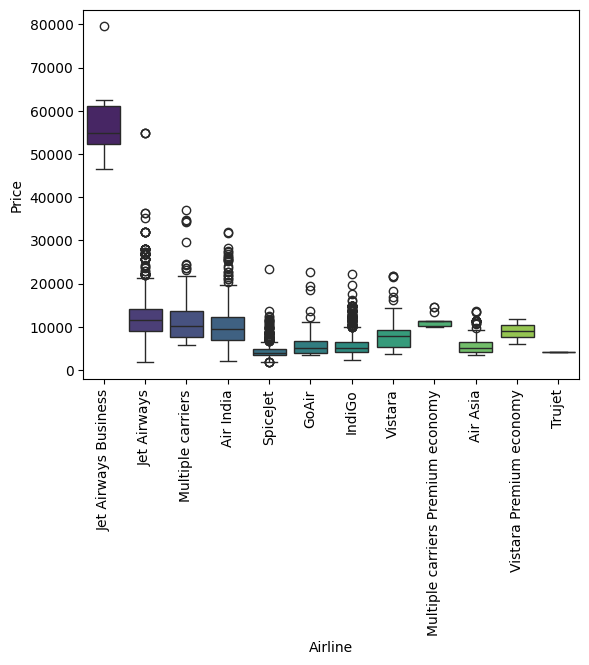

In [64]:
sns.boxplot(data = df.sort_values('Price', ascending = False), x = 'Airline', y = 'Price', orient="v", palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

## Key Observations from Your Data
By looking at all the boxes together, we can draw three major conclusions:

1. **Significant Price Variance**: "Jet Airways Business" is in a league of its own. Its lowest price is higher than the highest price of almost every other airline. In ML, this tells us that the "Airline" feature is a very strong predictor of price.

2. **The "Outlier" Problem:** Look at "Jet Airways" or "Air India." There are dozens of black circles at the top. This suggests that while most tickets are priced around 10k–15k, there are frequent "emergency" or "last-minute" fares that spike to 30k+.

3. **Budget Consistency**: Airlines like "SpiceJet," "GoAir," and "IndiGo" have very "short" boxes. This means their pricing is much more consistent and predictable compared to the legacy carriers.

---
**Feature Engineering**

"The graph shows that 'Jet Airways Business' behaves differently from 'Jet Airways.' I would check if 'Business Class' is a separate feature. If not, I might create a binary feature for 'Is_Premium_Airline' to help the model distinguish these high-value rows."


**Identifying Heteroscedasticity**

"The variance (the height of the boxes) changes significantly between airlines. This is called **Heteroscedasticity**. It's a signal that a simple Linear Regression might struggle, and I might need a more robust model like a Random Forest or XGBoost that handles different variances across categories more effectively."

**For this dataset, 3 classes is perfect**:

- Economy

- Premium_Economy

- Business


**Clean the Airline brand**

Right now:

> Jet Airways Business


We want:

> Jet Airways


So airline will have its own class

By separating brand and service tier, the model generalizes better and avoids memorizing category strings.


In [65]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [66]:
def extract_cabin_class(airline):
  airline = airline.lower()

  if 'business' in airline:
    return 'Business'
  elif 'premium' in airline:
    return 'Premium_Economy'
  else:
    return 'Economy'


In [67]:
df['Cabin_Class'] = df['Airline'].apply(extract_cabin_class)


In [68]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,is_train,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_in_minutes,Cabin_Class
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897.0,1,24,3,22,20,1,10,170,Economy
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662.0,1,1,5,5,50,13,15,445,Economy
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882.0,1,9,6,9,25,4,25,1140,Economy
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218.0,1,12,5,18,5,23,30,325,Economy
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302.0,1,1,3,16,50,21,35,285,Economy


In [69]:
df['Airline_Clean'] = (
    df['Airline']
    .str.replace('Business', '', case=False, regex=False)
    .str.replace('Premium economy', '', case=False, regex=False)
    .str.strip()
)


In [70]:
df.tail()

,Airline,Source,Destination,Route,Total_Stops,Price,is_train,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_in_minutes,Cabin_Class,Airline_Clean
13349,Air India,Kolkata,Banglore,CCU → DEL → BLR,1,NaN,0,6,6,20,30,20,25,1435,Economy,Air India
13350,IndiGo,Kolkata,Banglore,CCU → BLR,0,NaN,0,27,3,14,20,16,55,155,Economy,IndiGo
13351,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,NaN,0,6,3,21,50,4,25,395,Economy,Jet Airways
13352,Air India,Delhi,Cochin,DEL → BOM → COK,1,NaN,0,6,3,4,0,19,15,915,Economy,Air India
13353,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,NaN,0,15,6,4,55,19,15,860,Economy,Multiple carriers


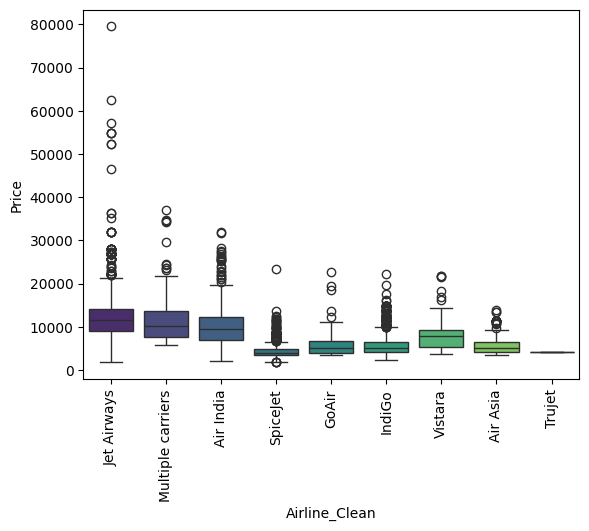

In [71]:
sns.boxplot(data = df.sort_values('Price', ascending = False), x = 'Airline_Clean', y = 'Price', orient="v", palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

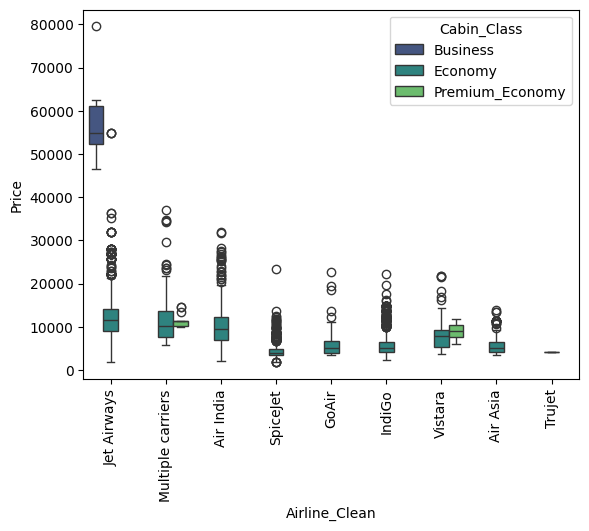

In [72]:
sns.boxplot(data = df.sort_values('Price', ascending = False), x = 'Airline_Clean', y = 'Price', hue='Cabin_Class', orient="v", palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

## 🔹 Q2: Will Route affect cost?

Feature type

- Route → high-cardinality categorical

- Price → numeric

Correct plot

⚠️ Box plot (but only after filtering top routes)

Why?

- Too many routes = unreadable plot

ML-engineer approach:

- Take top N routes by frequency

- Group rest as “Other”

📌 Plot:



```
x = Route (top N)
y = Price
```




In [73]:
top_10_routes = df['Route'].value_counts().nlargest(10).index

In [74]:
top_10_routes

Index(['DEL → BOM → COK', 'BLR → DEL', 'CCU → BOM → BLR', 'CCU → BLR',
       'BOM → HYD', 'CCU → DEL → BLR', 'BLR → BOM → DEL', 'MAA → CCU',
       'DEL → HYD → COK', 'DEL → JAI → BOM → COK'],
      dtype='object', name='Route')

In [75]:
# Filter the data
df_top_routes = df[df['Route'].isin(top_10_routes)]
df_top_routes

,Airline,Source,Destination,Route,Total_Stops,Price,is_train,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_in_minutes,Cabin_Class,Airline_Clean
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897.0,1,24,3,22,20,1,10,170,Economy,IndiGo
5,SpiceJet,Kolkata,Banglore,CCU → BLR,0,3873.0,1,24,6,9,0,11,25,145,Economy,SpiceJet
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1,11087.0,1,12,3,18,55,10,25,930,Economy,Jet Airways
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1,22270.0,1,1,3,8,0,5,5,1265,Economy,Jet Airways
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1,11087.0,1,12,3,8,55,10,25,1530,Economy,Jet Airways
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,CCU → DEL → BLR,1,NaN,0,6,6,20,30,20,25,1435,Economy,Air India
13350,IndiGo,Kolkata,Banglore,CCU → BLR,0,NaN,0,27,3,14,20,16,55,155,Economy,IndiGo
13351,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,NaN,0,6,3,21,50,4,25,395,Economy,Jet Airways
13352,Air India,Delhi,Cochin,DEL → BOM → COK,1,NaN,0,6,3,4,0,19,15,915,Economy,Air India


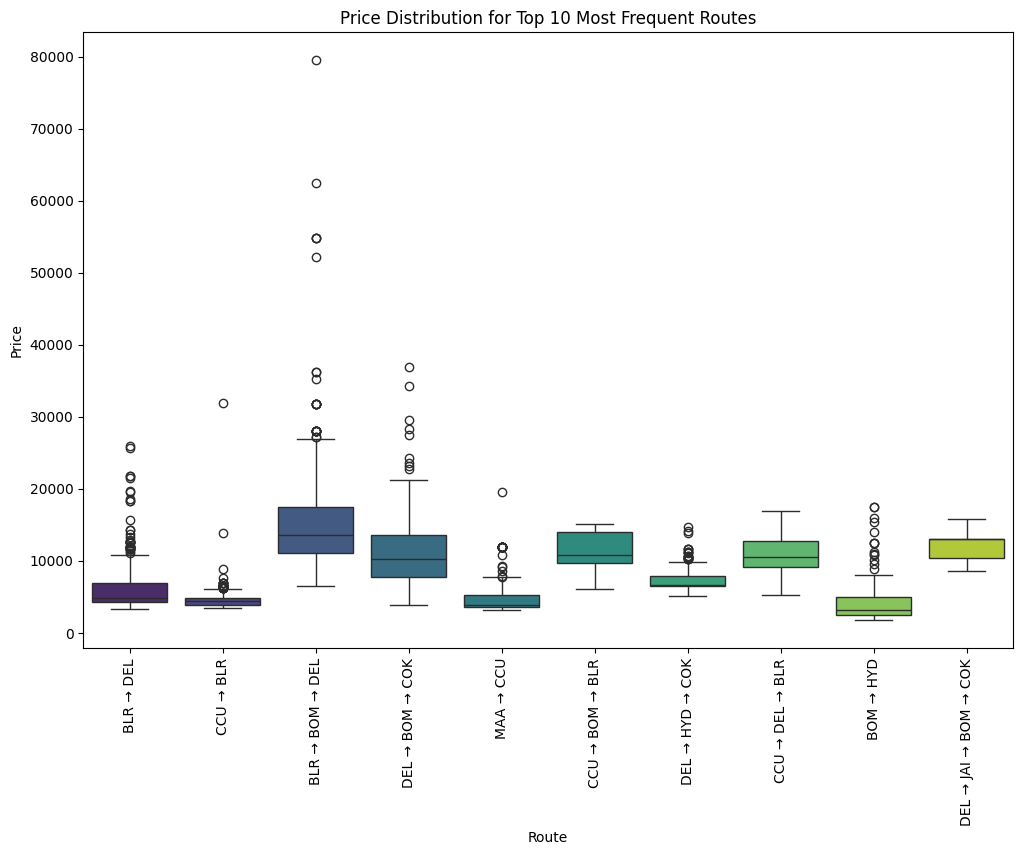

In [76]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_routes, x='Route', y='Price', palette='viridis')

# Rotate labels for readability
plt.xticks(rotation=90)
plt.title('Price Distribution for Top 10 Most Frequent Routes')
plt.show()

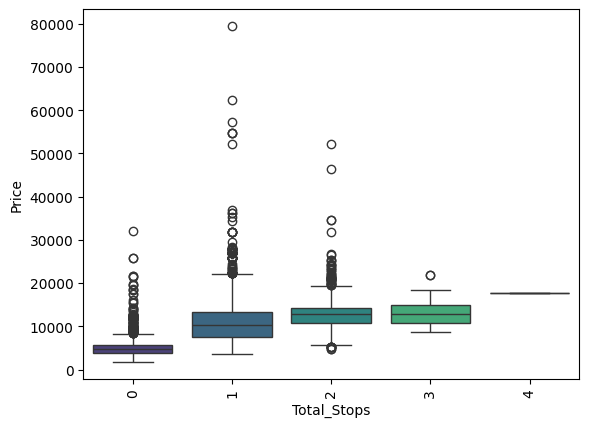

In [77]:
sns.boxplot(data = df.sort_values('Price', ascending = False), x = 'Total_Stops', y = 'Price', orient="v", palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

**1. Route-Based Observations (Top 10 Routes)**

The "Price Distribution for Top 10 Most Frequent Routes" graph reveals how geography and demand dictate cost.

- Varying Price Volatility: Routes like BLR → BOM → DEL show a very "tall" box and long upper whiskers, indicating high price variance. This suggests that pricing on this route is highly dynamic, likely catering to both early-bird travelers and high-paying last-minute business flyers.

- Budget-Friendly Corridors: Routes such as BOM → HYD and CCU → BLR have much lower medians and shorter boxes. These are likely short-haul or high-competition routes where prices remain consistently low.

- Extreme Outliers: The route BLR → BOM → DEL has extreme outliers reaching nearly 80,000. As an ML Engineer, this is a red flag for "Noise" or "Special Cases" (like emergency holiday bookings) that could skew a model's mean squared error.

---


**2. Impact of "Total Stops" on Price**

The second image provides a clear look at how flight complexity adds to the cost.

- Positive Correlation with Price: There is a clear upward trend; as the number of stops increases from 0 to 3, the median price (the horizontal line inside the box) also increases.

- The "Direct Flight" Advantage: 0-stop (direct) flights have the lowest median price and the smallest Interquartile Range (IQR), meaning their pricing is the most predictable and generally the cheapest in this dataset.

- Diminishing Returns (4 Stops): The 4-stop category appears as a flat line, likely representing a very small sample size where all recorded flights happened to be at a similar price point (around 20,000).

- Outlier Concentration: Interestingly, 1-stop and 2-stop flights have the most significant outliers. This suggests that "premium" or "last-minute" pricing is most aggressive on multi-hop journeys rather than direct flights.

## Will Day and Month affect cost?

Split this into two questions.

Day (1–31)

* Numeric but discrete

✅ Box plot or line plot

* Box → distribution per day

* Line → trend

ML choice:

* Use box plot first (outliers matter)

---

Month (1–12)

* Ordinal categorical

* Seasonal effect expected

✅ Line plot (mean price per month)
or
✅ Box plot (distribution per month)

ML engineers usually do both:

* Line → trend

* Box → variability

In [78]:
df['Day'].unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21])

In [79]:
numpy_df = df['Day'].unique()
print(numpy_df)
numpy_df.sort()

print(numpy_df)

[24  1  9 12 27 18  3 15  6 21]
[ 1  3  6  9 12 15 18 21 24 27]


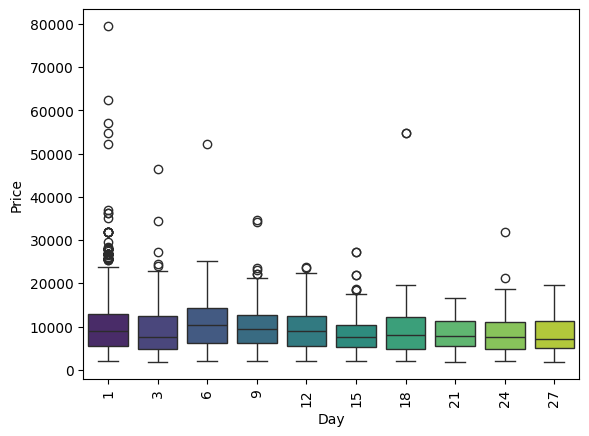

In [80]:
sns.boxplot(data = df.sort_values('Price', ascending = False), x = 'Day', y = 'Price', orient="v", palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

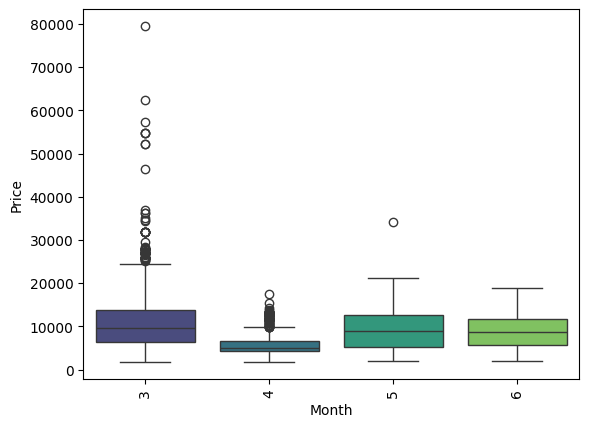

In [81]:
sns.boxplot(data = df.sort_values('Price', ascending = False), x = 'Month', y = 'Price', orient="v", palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

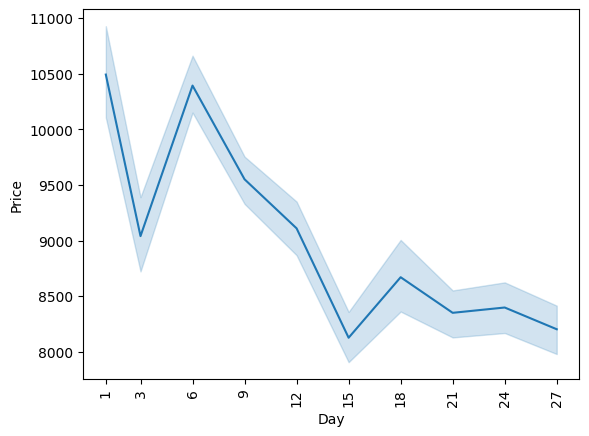

In [82]:
unique_days = df['Day'].unique()
sorted_unique_days = sorted(unique_days)
sns.lineplot(data = df, x = 'Day', y = 'Price')
plt.xticks(ticks=sorted_unique_days, rotation='vertical') # Set ticks to show all unique days
plt.show()

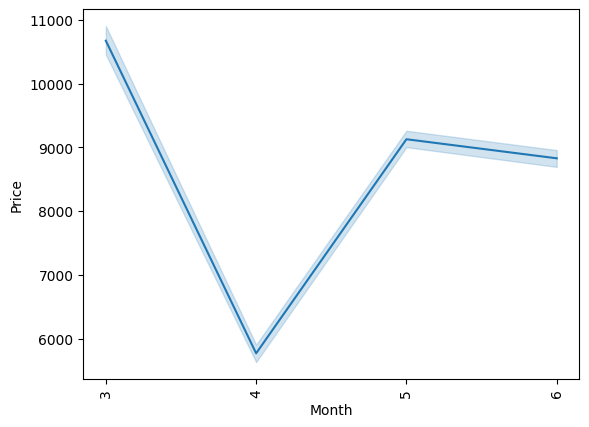

In [83]:
unique_months = df['Month'].unique()
sns.lineplot(data = df, x = 'Month', y = 'Price')
plt.xticks(ticks=unique_months, rotation='vertical') # Set ticks to show all unique months
plt.show()

## Will Duration affect cost?

Feature type

- Duration_in_minutes → numeric

- Price → numeric

Correct plot
✅ Scatter plot

Why?

- Relationship

- Trend

Outliers

📌 Enhancement:

- Log transform price if skewed

- Add trend line

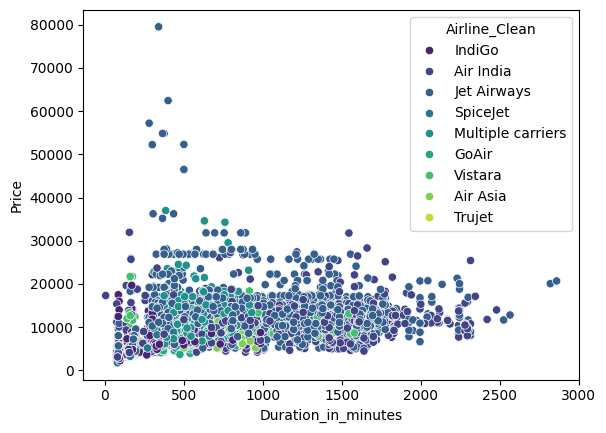

In [84]:
sns.scatterplot(data=df, x='Duration_in_minutes', y='Price', hue='Airline_Clean', palette='viridis')
plt.show()

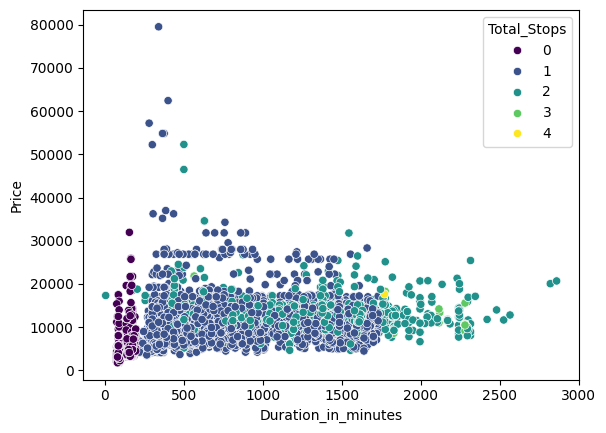

In [85]:
sns.scatterplot(data=df, x='Duration_in_minutes', y='Price', hue='Total_Stops', palette='viridis')
plt.show()

There're correlation between duration total and total stops where more stops has more duration spreads.

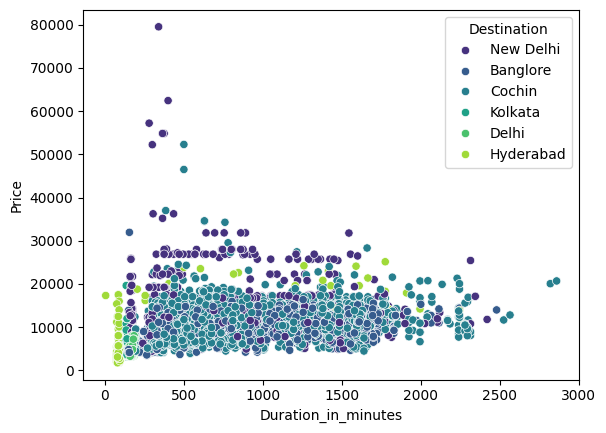

In [86]:
sns.scatterplot(data=df, x='Duration_in_minutes', y='Price', hue='Destination', palette='viridis')
plt.show()

Price for New Delhi is comparitively high

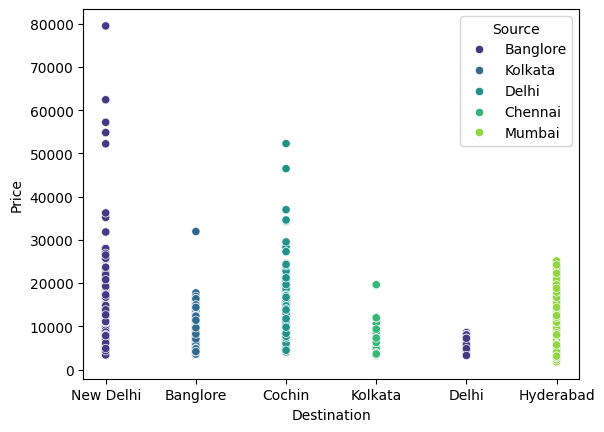

In [87]:
sns.scatterplot(data=df, x='Destination', y='Price', hue='Source', palette='viridis')
plt.show()

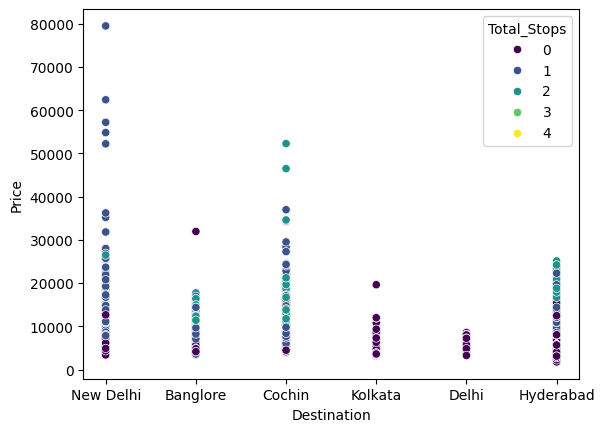

In [88]:
sns.scatterplot(data=df, x='Destination', y='Price', hue='Total_Stops', palette='viridis')
plt.show()

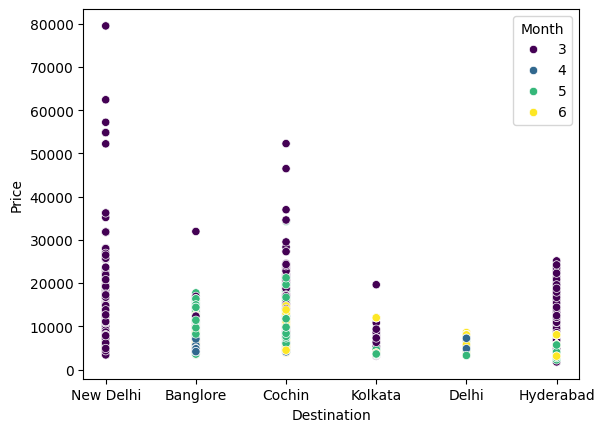

In [89]:
sns.scatterplot(data=df, x='Destination', y='Price', hue='Month', palette='viridis')
plt.show()

Month 3 (March) consistently shows the highest price peaks across almost all destinations.

A. Non-Linearity<br>
"The relationship between Month and Price is non-linear. Prices don't just go up every month; they peak in March and then drop. Therefore, I should treat Month as a categorical variable (using One-Hot Encoding) rather than a simple numerical 1-12 scale, so the model can learn the specific impact of March."

B. Impact on Evaluation (RMSE)<br>
"Because March has such extreme outliers (80k vs. the 10k average), a standard loss function like Mean Squared Error (MSE) will penalize the model heavily for missing those March peaks. I might need to use a Log Transformation on the Price to make the distribution more 'Normal' and less dominated by those March outliers."

## Check the frequency between month.

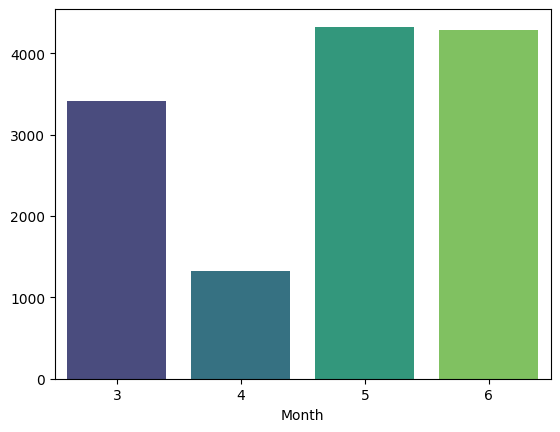

In [90]:
count = df['Month'].value_counts()
sns.barplot(x=count.index, y=count.values, palette='viridis')
plt.show()

### Lets look at price distributing as per each airline

1️⃣ Quartiles

- Q1 (25%) → 25% of prices are below this

- Q3 (75%) → 75% of prices are below this

This captures the middle 50% of prices.

---


Any price:

- Above upper_limit → unusually expensive

- Below lower_limit → unusually cheap

In [91]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

In [92]:
Q1, Q3

(np.float64(5277.0), np.float64(12373.0))

In [93]:
IQR = Q3 - Q1
IQR

np.float64(7096.0)

In [94]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [95]:
upper_limit , lower_limit

(np.float64(23017.0), np.float64(-5367.0))

📌 Negative price doesn’t make sense → only care about upper outliers.

What is happening here

You are saying:

> “Show me only flights that are very expensive, grouped by airline.”

Important detail:



```
df_train['Price'][df_train['Price'] > upper_limit]
```



This filters:

- Keep only rows where price is an outlier

- Then plot airline vs those prices

📌 This reveals who produces expensive flights, not overall price behavior.

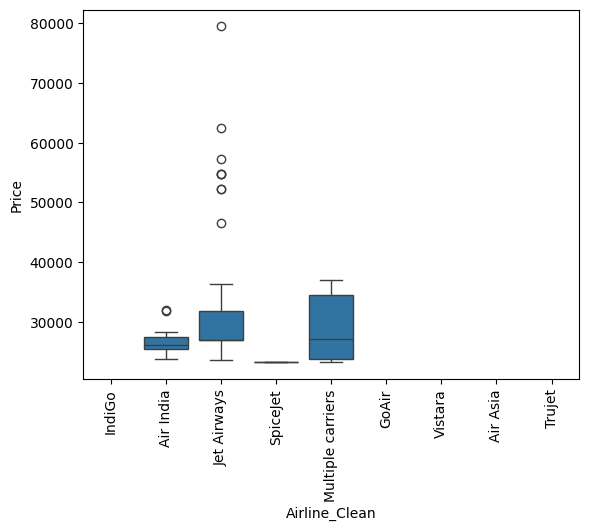

In [96]:
sns.boxplot(x=df['Airline_Clean'], y=df['Price'][df['Price'] > upper_limit])
plt.xticks(rotation='vertical')
plt.show()

### Measuring outlier percentage per airline
This gives:

- airline_outliers → how many expensive flights per airline

- airline_count → total flights per airline

In [97]:
airline_outliers = df['Airline_Clean'][df['Price'] > upper_limit].value_counts()
airline_count = df['Airline_Clean'].value_counts()

In [98]:
airline_outliers , airline_count

(Airline_Clean
 Jet Airways          68
 Air India            15
 Multiple carriers    10
 SpiceJet              1
 Name: count, dtype: int64,
 Airline_Clean
 Jet Airways          4754
 IndiGo               2564
 Air India            2191
 Multiple carriers    1559
 SpiceJet             1026
 Vistara               613
 Air Asia              405
 GoAir                 240
 Trujet                  1
 Name: count, dtype: int64)

### Lets Answer
“What % of an airline’s flights are extreme outliers?”


In [99]:
airline_outliers.index

Index(['Jet Airways', 'Air India', 'Multiple carriers', 'SpiceJet'], dtype='object', name='Airline_Clean')

In [100]:
for x in airline_outliers.index:
  print(x)
  print(airline_outliers[x])
  print(airline_count[x])
  print('\n')

Jet Airways
68
4754


Air India
15
2191


Multiple carriers
10
1559


SpiceJet
1
1026




In [101]:
for x in airline_outliers.index:
  print(f"{x} : {airline_outliers[x] / airline_count[x] * 100:.2f}% / {airline_count[x]}")

Jet Airways : 1.43% / 4754
Air India : 0.68% / 2191
Multiple carriers : 0.64% / 1559
SpiceJet : 0.10% / 1026


📌 Interpretation:

Jet Airways = separate population

Others → rare noise


# Encoding the categorical data

In [102]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,is_train,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_in_minutes,Cabin_Class,Airline_Clean
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897.0,1,24,3,22,20,1,10,170,Economy,IndiGo
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662.0,1,1,5,5,50,13,15,445,Economy,Air India
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882.0,1,9,6,9,25,4,25,1140,Economy,Jet Airways
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218.0,1,12,5,18,5,23,30,325,Economy,IndiGo
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302.0,1,1,3,16,50,21,35,285,Economy,IndiGo


### Convert Cabin_Class Using Ordinal Encoding

In [103]:
df['Cabin_Class'].unique()

array(['Economy', 'Premium_Economy', 'Business'], dtype=object)

In [104]:
cabin_class_order = {'Economy': 0, 'Premium_Economy': 1, 'Business': 2}
df['Cabin_Class'] = df['Cabin_Class'].map(cabin_class_order)

In [105]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,is_train,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_in_minutes,Cabin_Class,Airline_Clean
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897.0,1,24,3,22,20,1,10,170,0,IndiGo
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662.0,1,1,5,5,50,13,15,445,0,Air India
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882.0,1,9,6,9,25,4,25,1140,0,Jet Airways
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218.0,1,12,5,18,5,23,30,325,0,IndiGo
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302.0,1,1,3,16,50,21,35,285,0,IndiGo


In [106]:
df['Cabin_Class'].unique()

array([0, 1, 2])

### OHE For Airline

The pandas function `pd.get_dummies()` is used to convert categorical variables into dummy/indicator variables using one-hot encoding.

In [107]:
# Perform one-hot encoding for the 'Airline_Clean' feature
airline_one_hot = pd.get_dummies(df['Airline_Clean'], drop_first=True, dtype=int)
airline_one_hot



,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
13349,1,0,0,0,0,0,0,0
13350,0,0,1,0,0,0,0,0
13351,0,0,0,1,0,0,0,0
13352,1,0,0,0,0,0,0,0


In [108]:
# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, airline_one_hot], axis=1)

In [109]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,is_train,Day,Month,Dep_Hour,...,Cabin_Class,Airline_Clean,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897.0,1,24,3,22,...,0,IndiGo,0,0,1,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662.0,1,1,5,5,...,0,Air India,1,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882.0,1,9,6,9,...,0,Jet Airways,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218.0,1,12,5,18,...,0,IndiGo,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302.0,1,1,3,16,...,0,IndiGo,0,0,1,0,0,0,0,0


In [110]:
# Drop the original 'Airline_Clean' column as it's now encoded
df.drop(columns=['Airline_Clean'], inplace=True)

In [111]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,is_train,Day,Month,Dep_Hour,...,Duration_in_minutes,Cabin_Class,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897.0,1,24,3,22,...,170,0,0,0,1,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662.0,1,1,5,5,...,445,0,1,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882.0,1,9,6,9,...,1140,0,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218.0,1,12,5,18,...,325,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302.0,1,1,3,16,...,285,0,0,0,1,0,0,0,0,0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 13353
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              13353 non-null  object 
 1   Source               13353 non-null  object 
 2   Destination          13353 non-null  object 
 3   Route                13353 non-null  object 
 4   Total_Stops          13353 non-null  int64  
 5   Price                10682 non-null  float64
 6   is_train             13353 non-null  int64  
 7   Day                  13353 non-null  int64  
 8   Month                13353 non-null  int64  
 9   Dep_Hour             13353 non-null  int64  
 10  Dep_Min              13353 non-null  int64  
 11  Arrival_Hour         13353 non-null  int64  
 12  Arrival_Min          13353 non-null  int64  
 13  Duration_in_minutes  13353 non-null  int64  
 14  Cabin_Class          13353 non-null  int64  
 15  Air India            13353 non-null  int6

**Drop Airline**


```
Airline ≈ Airline_clean + Cabin_Class
```



In [113]:
df.drop(columns=['Airline'], inplace=True)

In [114]:
df.head()

,Source,Destination,Route,Total_Stops,Price,is_train,Day,Month,Dep_Hour,Dep_Min,...,Duration_in_minutes,Cabin_Class,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara
0,Banglore,New Delhi,BLR → DEL,0,3897.0,1,24,3,22,20,...,170,0,0,0,1,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662.0,1,1,5,5,50,...,445,0,1,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882.0,1,9,6,9,25,...,1140,0,0,0,0,1,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,1,6218.0,1,12,5,18,5,...,325,0,0,0,1,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,1,13302.0,1,1,3,16,50,...,285,0,0,0,1,0,0,0,0,0


### OHE For Source And Destination

**Drop Route**


```
Route ≈ Source + Destination + Stops + Duration

```



In [115]:
df.drop(columns=['Route'], inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 13353
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Source               13353 non-null  object 
 1   Destination          13353 non-null  object 
 2   Total_Stops          13353 non-null  int64  
 3   Price                10682 non-null  float64
 4   is_train             13353 non-null  int64  
 5   Day                  13353 non-null  int64  
 6   Month                13353 non-null  int64  
 7   Dep_Hour             13353 non-null  int64  
 8   Dep_Min              13353 non-null  int64  
 9   Arrival_Hour         13353 non-null  int64  
 10  Arrival_Min          13353 non-null  int64  
 11  Duration_in_minutes  13353 non-null  int64  
 12  Cabin_Class          13353 non-null  int64  
 13  Air India            13353 non-null  int64  
 14  GoAir                13353 non-null  int64  
 15  IndiGo               13353 non-null  int6

In [117]:
# Perform one-hot encoding for the 'Source' feature
Source_one_hot = pd.get_dummies(df['Source'], drop_first=True, dtype=int)
print(Source_one_hot)


# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, Source_one_hot], axis=1)


# Drop the original 'Source' column as it's now encoded
df.drop(columns=['Source'], inplace=True)

       Chennai  Delhi  Kolkata  Mumbai
0            0      0        0       0
1            0      0        1       0
2            0      1        0       0
3            0      0        1       0
4            0      0        0       0
...        ...    ...      ...     ...
13349        0      0        1       0
13350        0      0        1       0
13351        0      1        0       0
13352        0      1        0       0
13353        0      1        0       0

[13353 rows x 4 columns]


In [118]:
# Perform one-hot encoding for the 'Destination' feature
Destination_one_hot = pd.get_dummies(df['Destination'], drop_first=True, dtype=int)
print(Destination_one_hot)


# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, Destination_one_hot], axis=1)


# Drop the original 'Destination' column as it's now encoded
df.drop(columns=['Destination'], inplace=True)

       Cochin  Delhi  Hyderabad  Kolkata  New Delhi
0           0      0          0        0          1
1           0      0          0        0          0
2           1      0          0        0          0
3           0      0          0        0          0
4           0      0          0        0          1
...       ...    ...        ...      ...        ...
13349       0      0          0        0          0
13350       0      0          0        0          0
13351       1      0          0        0          0
13352       1      0          0        0          0
13353       1      0          0        0          0

[13353 rows x 5 columns]


In [119]:
df.head()

,Total_Stops,Price,is_train,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_in_minutes,...,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897.0,1,24,3,22,20,1,10,170,...,0,0,0,0,0,0,0,0,0,1
1,2,7662.0,1,1,5,5,50,13,15,445,...,0,0,0,1,0,0,0,0,0,0
2,2,13882.0,1,9,6,9,25,4,25,1140,...,0,0,1,0,0,1,0,0,0,0
3,1,6218.0,1,12,5,18,5,23,30,325,...,0,0,0,1,0,0,0,0,0,0
4,1,13302.0,1,1,3,16,50,21,35,285,...,0,0,0,0,0,0,0,0,0,1


# Correlation

In [120]:
correlation = df['Total_Stops'].corr(df['Price'])
print(f"The correlation between Total_Stops and Price is: {correlation:.4f}")

The correlation between Total_Stops and Price is: 0.6039


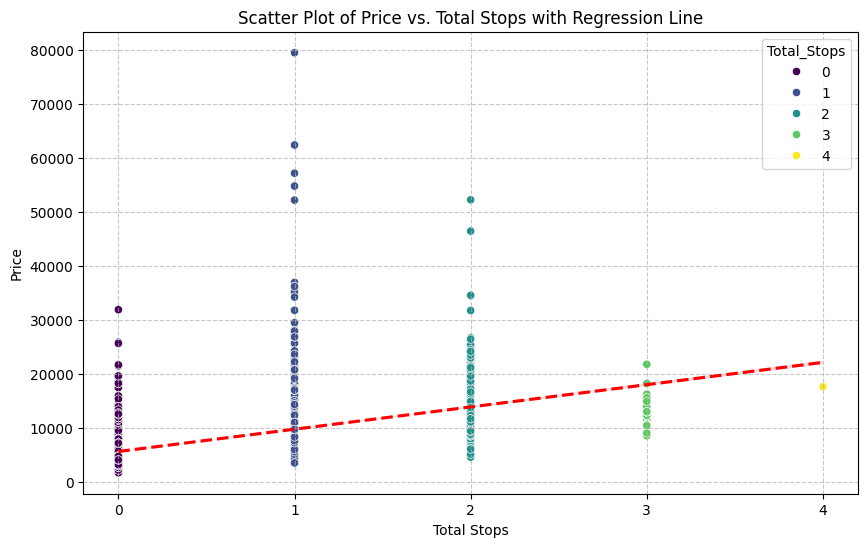

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total_Stops', y='Price', hue='Total_Stops', palette='viridis', legend='full')
sns.regplot(data=df, x='Total_Stops', y='Price', scatter=False, color='red', line_kws={'linestyle': '--'})
plt.title('Scatter Plot of Price vs. Total Stops with Regression Line')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.xticks(df['Total_Stops'].unique())
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [122]:
correlation_matrix = df.corr(numeric_only=True)
display(correlation_matrix.head())

,Total_Stops,Price,is_train,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_in_minutes,...,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Total_Stops,1.000000,0.603897,-0.005459,-0.011065,0.046916,-0.070698,-0.000137,0.037167,-0.108234,0.736922,...,-0.124842,-0.230242,0.485289,0.036831,-0.263291,0.485289,-0.448893,-0.263291,-0.230242,-0.013921
Price,0.603897,1.000000,NaN,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.506480,...,-0.060510,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
is_train,-0.005459,NaN,1.000000,0.028125,-0.003391,-0.007846,-0.010242,-0.013689,0.003198,0.002589,...,-0.007498,0.016714,-0.003268,0.002665,-0.007062,-0.003268,-0.000320,-0.007062,0.016714,-0.002625
Day,-0.011065,-0.153774,0.028125,1.000000,-0.035480,-0.003011,-0.008918,0.000940,-0.014630,-0.022843,...,-0.013201,0.009332,0.091617,-0.059435,-0.016417,0.091617,0.009018,-0.016417,0.009332,-0.068950
Month,0.046916,-0.103643,-0.003391,-0.035480,1.000000,0.034506,-0.069431,-0.003214,-0.110277,0.008280,...,-0.017980,0.009901,0.138833,0.083320,-0.037079,0.138833,0.094216,-0.037079,0.009901,-0.454774


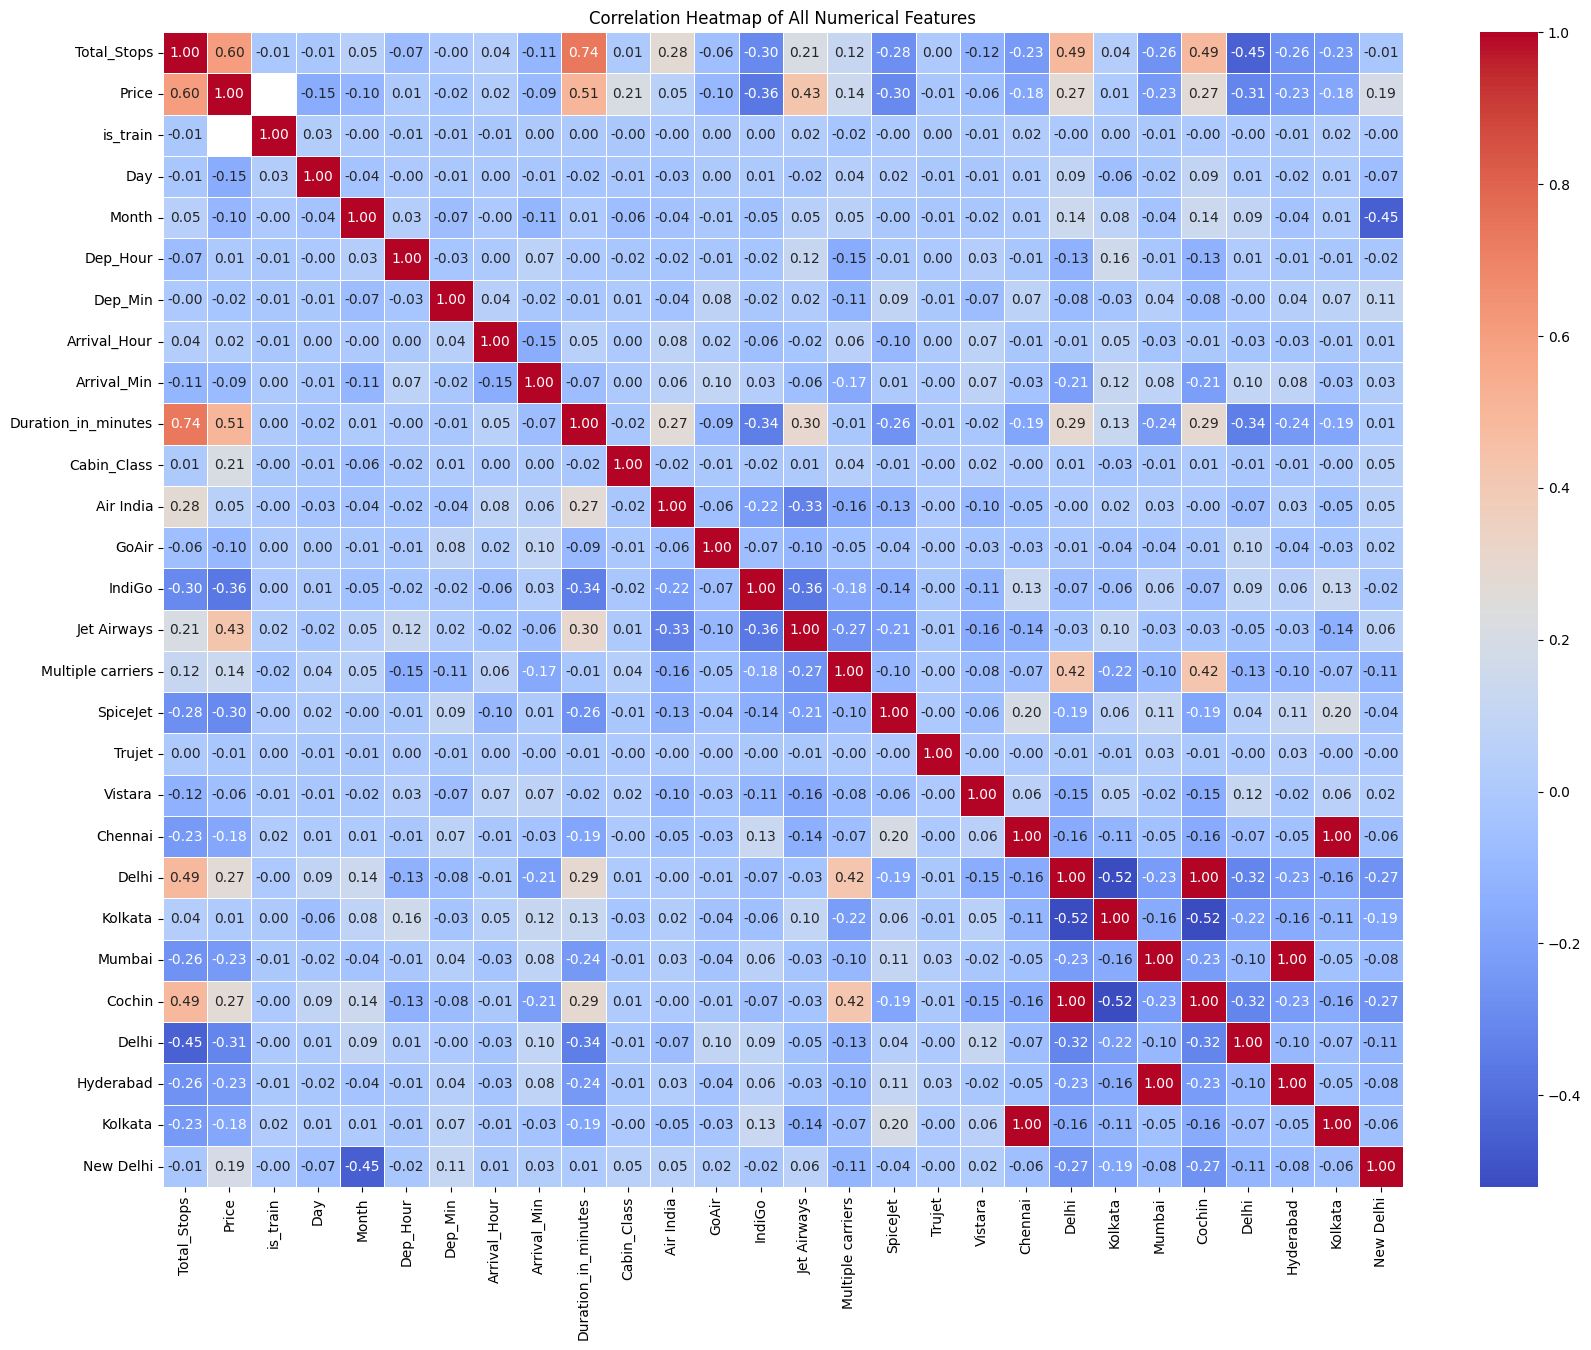

In [123]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of All Numerical Features')
plt.show()

## Key Insights from Your Data

Looking at the Price row/column, we can identify which features actually matter for our model:

1. Total_Stops ($0.60$): This is your strongest predictor. A correlation of 0.60 is quite high in real-world data. It confirms our earlier box plot observation: more stops generally lead to higher prices

2. Duration_in_minutes ($0.51$): There is a strong positive correlation here. Longer flights tend to be more expensive. This makes sense—longer flights consume more fuel and often involve more stops.

3. Jet Airways ($0.43$): This specific airline has a notable positive correlation with Price. This mathematically proves that seeing "Jet Airways" in the data is a strong signal that the price will be higher than average.

4. IndiGo ($-0.36$): This has a negative correlation. When the airline is IndiGo, the price tends to decrease. This identifies IndiGo as a budget carrier in this dataset.

---

## Feature Selection and Multicollinearity.

1. Redundancy (Multicollinearity)

Look at the intersection of Total_Stops and Duration_in_minutes ($0.74$).

> "I notice a very high correlation (0.74) between 'Total_Stops' and 'Duration'. This indicates Multicollinearity. In linear models, having both might be redundant and can inflate the variance of our coefficients. I might consider dropping one or using a dimensionality reduction technique like PCA.

2. Feature Importance

> "Based on this heatmap, I can prioritize 'Total_Stops', 'Duration', and specific airline 'One-Hot' encodings (like Jet Airways) as my primary features. Conversely, features like 'Day' ($-0.15$) and 'Dep_Min' ($-0.02$) have very low correlation with Price, suggesting they might be candidates for removal to simplify the model.


3. The "Month" Surprise

> You previously noticed Month 3 was expensive, yet the correlation for Month is only $-0.10$."The heatmap shows a low linear correlation for 'Month', even though we saw spikes in our scatter plot. This tells me the relationship is non-linear. A Pearson correlation only captures straight-line relationships. This is a great argument for using a non-linear model like a **Random Forest or XGBoost** which can capture those seasonal spikes that a linear correlation matrix misses.

---

### Recap:
- Total_Stops and Duration are your heavy hitters.
- Jet Airways vs IndiGo represents the high-end vs low-end of your price spectrum.
- High correlation between features (0.74) warns us about redundancy.

# Model Training

# Linear Regression

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Feature Selection

In [125]:
# Filter out rows where 'Price' is NaN to create the full training dataset
df_train_cleaned = df[df['Price'].notna()].copy()

In [126]:
df_train_cleaned

,Total_Stops,Price,is_train,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_in_minutes,...,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897.0,1,24,3,22,20,1,10,170,...,0,0,0,0,0,0,0,0,0,1
1,2,7662.0,1,1,5,5,50,13,15,445,...,0,0,0,1,0,0,0,0,0,0
2,2,13882.0,1,9,6,9,25,4,25,1140,...,0,0,1,0,0,1,0,0,0,0
3,1,6218.0,1,12,5,18,5,23,30,325,...,0,0,0,1,0,0,0,0,0,0
4,1,13302.0,1,1,3,16,50,21,35,285,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107.0,1,9,4,19,55,22,25,150,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145.0,1,27,4,20,45,23,20,155,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229.0,1,27,4,8,20,11,20,180,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648.0,1,1,3,11,30,14,10,160,...,1,0,0,0,0,0,0,0,0,1


In [127]:
# Now, define X_train_full and y_train_full from the cleaned training data
X = df_train_cleaned.drop(columns=['Price', 'is_train'], axis=1)
y = df_train_cleaned['Price']


In [128]:
X.head()

,Total_Stops,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_in_minutes,Cabin_Class,Air India,...,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,170,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,445,0,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,1140,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,325,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,285,0,0,...,0,0,0,0,0,0,0,0,0,1


In [129]:
y.head()

,Price
0,3897.0
1,7662.0
2,13882.0
3,6218.0
4,13302.0


In [130]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=42) # 70 Training and 30 testing

In [131]:
# 1. Initialize the selector to pick the top 5 features
selector = SelectKBest(score_func=f_regression, k=5)

# 2. Fit to your data (X = features, y = price)
selector.fit_transform(X, y)

# 3. See the scores!
print(selector.scores_)

[6.13072991e+03 2.58659237e+02 1.15969505e+02 4.93755271e-01
 6.39243513e+00 6.28095426e+00 7.98676915e+01 3.68491247e+03
 4.74614653e+02 2.72321268e+01 9.75772251e+01 1.60110933e+03
 2.40173884e+03 2.16877403e+02 1.02989192e+03 1.15099827e+00
 3.92485475e+01 3.54436650e+02 8.44333831e+02 9.35267697e-01
 6.00674460e+02 8.44333831e+02 1.16337352e+03 6.00674460e+02
 3.54436650e+02 3.99012378e+02]


**Basics**




"Scikit-Learn transformers are index-preserved. This means the order of the scores in the scores_ attribute corresponds exactly to the order of columns in the input matrix **X**.

To make this interpretable, I wrap the results in a Pandas DataFrame, zip them with X.columns, and sort them.

This allows me to validate the statistical 'signals' against my initial EDA (Exploratory Data Analysis).


**Self-Correction**


- Always check X.columns first.

Recap of the values:

- e+03 = Move decimal 3 places right (Thousands).
- e+02 = Move decimal 2 places right (Hundreds).
- e-01 = Move decimal 1 place left (Decimals/Zero).

In [132]:
# 1. Create a DataFrame with Feature Names and their corresponding Scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': selector.scores_
})

# 2. Sort them by Score in descending order (highest at the top)
feature_scores = feature_scores.sort_values(by='F_Score', ascending=False)

print(feature_scores)

                Feature      F_Score
0           Total_Stops  6130.729912
7   Duration_in_minutes  3684.912469
12          Jet Airways  2401.738842
11               IndiGo  1601.109331
22                Delhi  1163.373521
14             SpiceJet  1029.891922
21               Cochin   844.333831
18                Delhi   844.333831
23            Hyderabad   600.674460
20               Mumbai   600.674460
8           Cabin_Class   474.614653
25            New Delhi   399.012378
24              Kolkata   354.436650
17              Chennai   354.436650
1                   Day   258.659237
13    Multiple carriers   216.877403
2                 Month   115.969505
10                GoAir    97.577225
6           Arrival_Min    79.867692
16              Vistara    39.248548
9             Air India    27.232127
4               Dep_Min     6.392435
5          Arrival_Hour     6.280954
15               Trujet     1.150998
19              Kolkata     0.935268
3              Dep_Hour     0.493755


- Index 0 ($6.1307e+03$): In your dataset, Total_Stops is usually the first column. Its massive score of ~6,130 makes it the undisputed "MVP".
- Index 7 ($3.6849e+03$): This corresponds to Duration_in_minutes. A high score of ~3,684 matches the strong correlation we saw in your heatmap.
- Index 12 ($2.4017e+03$): This represents Jet Airways. This confirms our observation that specific legacy airlines are huge price drivers.
- Index 3 ($4.9375e-01$): This is 0.49. It likely maps to Dep_Min. As we suspected, the exact minute of departure is "noise" and has almost zero predictive power.

**Identifying the "Heavy Hitters**

"By matching these scores to the order of features in your heatmap, we can see which features the math is "flagging" as the most important:

1. Total_Stops (~6,130): This is your highest score by far. It mathematically confirms what we saw in the box plots—the number of stops is the primary driver of price.

2. Duration_in_minutes (~3,684): The second-highest score. This aligns with our heatmap which showed a $0.51$ correlation.

3. Jet Airways (~2,401): This confirms that being a specific airline (the high-cost one) is a massive predictor of price.

4. IndiGo (~1,601): Even though IndiGo is "cheap" (negative correlation), the relationship is very strong, so it gets a high F-score.

---

**Identifying the "Noise"**

Look at values like 0.49, 6.39, or 1.15. These likely correspond to:

1. Dep_Hour / Dep_Min: The exact minute a plane takes off has almost zero impact on the final price.

2. Trujet: As we saw in the first box plot, there was almost no data/variance for Trujet, so the model can't learn anything useful from it.

## Split the Data

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # training = 70% data, testing = 30% data

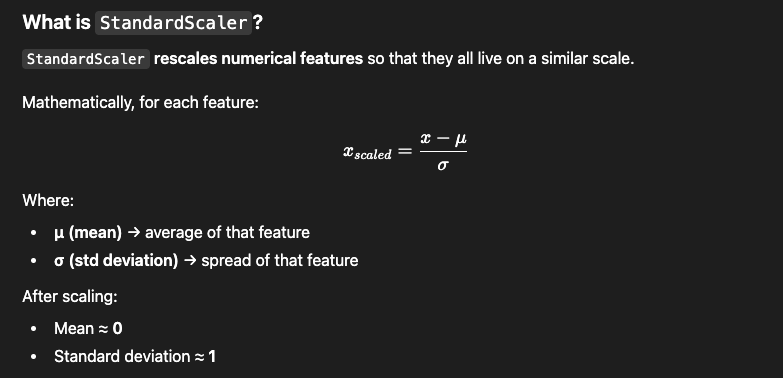

**Correct pipeline (this is IMPORTANT)**

1. Step 1: Split FIRST


```
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
```




2. Step 2: Fit scaler ONLY on training data

```
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
```

3. Step 3: Transform test data using SAME scaler

```X_test[num_cols] = scaler.transform(X_test[num_cols])```


**🚨 Never fit on test data**
> That causes data leakage.

---

Why not scale before splitting?

Because test data represents future unseen data.
If the scaler learns from it, your evaluation becomes unrealistic.

In [134]:
scaler = StandardScaler()

In [135]:
X_train = scaler.fit_transform(X_train)

In [136]:
X_train

array([[-1.22489201,  1.57949139,  1.10593642, ...,  3.86554404,
        -0.19540685, -0.31398962],
       [-1.22489201,  0.87097082,  1.10593642, ..., -0.2586958 ,
        -0.19540685, -0.31398962],
       [ 0.25658932,  1.57949139,  0.24770221, ..., -0.2586958 ,
        -0.19540685, -0.31398962],
       ...,
       [ 0.25658932,  0.16245024,  0.24770221, ..., -0.2586958 ,
        -0.19540685, -0.31398962],
       [-1.22489201, -1.25459091, -1.46876621, ..., -0.2586958 ,
        -0.19540685,  3.18481868],
       [ 0.25658932, -1.49076444,  1.10593642, ..., -0.2586958 ,
        -0.19540685, -0.31398962]])

In [137]:
X_test = scaler.transform(X_test)

### Model

In [138]:
model = LinearRegression()

### Train the Model

In [139]:
model.fit(X_train, y_train)

LinearRegression()

### Prediction

This tells you:

> “How well did I fit the data I trained on?”

In [140]:
y_train_pred = model.predict(X_train)

In [141]:
y_train_pred

array([ 5749.65117002,  3157.90170662, 10087.62262881, ...,
       10774.22802549,  7607.58808397, 12323.8461001 ])

This tells you:

> “How well do I perform on unseen data?”

**🚨 The model has never seen y_test during training.**

In [142]:
y_test_pred = model.predict(X_test)
y_test_pred

array([13337.97956026,  7605.05083723,  9606.83557276, ...,
        4713.87832385,  4846.77063916,  7442.43335846])

In [143]:
model.score(X_train, y_train)

0.5998387405216359

## Compute the loss on Training Data

In [144]:
mean_absolute_error(y_train, y_train_pred)

1991.0164244170946

In [145]:
mean_squared_error(y_train, y_train_pred)

8656540.866575375

In [146]:
# root mean squared error
np.sqrt(mean_squared_error(y_train, y_train_pred))

np.float64(2942.200004516242)

In [147]:
r2_score(y_train, y_train_pred)

0.5998387405216359

Adjusted R² = `1 – [(1-R²) * (n-1) / (n-p-1)]`

Where:

- R² is the R-squared of the model.
- n is the number of observations (samples).
- p is the number of predictor variables (features).

In [148]:
r2 = r2_score(y_train, y_train_pred) # Calculate the R2 score first

n = X_train.shape[0] # Number of observations
p = X_train.shape[1] # Number of features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R2 score: {adjusted_r2:.4f}")

Adjusted R2 score: 0.5984


## Analysis

**1️⃣ First: zoom out — what are these numbers about?**

You trained a regression model to predict flight price.

So every error metric is answering:

> “How far off are my predicted prices from the real prices, in rupees or dollar etc?”

Each metric just measures that error in a different way, emphasizing different things.

---

**2️⃣ MAE — Mean Absolute Error**

**MAE: ~1991**

What it means (plain English)

> On average, your prediction is off by ₹1991.

No squaring. No fancy math. Just:

```|predicted_price - actual_price|```


averaged over all rows.

**Why MAE is nice**

- Easy to explain to non-ML people

- Robust to outliers

- Directly in price units

**How you should interpret it**

Ask yourself:

> “If a flight costs ₹10,000, am I okay being wrong by ~₹2,000?”

For cheap flights → that’s big

For expensive flights → maybe acceptable

👉 MAE gives business intuition

---

**3️⃣ MSE — Mean Squared Error**

**MSE: ~8,656,540**

This number looks scary — but don’t panic, it’s squared units.

What it does

- Squares each error before averaging

- Large errors hurt much more

**Why it exists**

- Penalizes large mistakes

- Smooths gradients for optimization

**Why humans hate interpreting it**

Because:

```₹² (rupees squared) is meaningless to humans```


👉 MSE is mainly useful internally, not for interpretation.

---

**4️⃣ RMSE — Root Mean Squared Error**

RMSE: ~2942

This is where MSE becomes human again.

What it means

> “If I make a ‘typical big mistake’, it’s around ₹2942.”

Because:

- Squaring exaggerates big errors

- RMSE is sensitive to outliers

**Compare RMSE vs MAE**

- MAE: 1991

- RMSE: 2942

👉 RMSE > MAE ⇒ you have some large errors

That’s a diagnostic signal:

> Some flights are being predicted very badly.

Likely:

- Rare routes

- Very long flights

- Premium cabin tickets

---

**5️⃣ R² Score**

**R² ≈ 0.60**

What R² answers

> “How much of the price variation does my model explain?”

- 0.60 = 60% of price variability explained

- 40% still unexplained

Mental model

- R² = 0 → model as good as predicting the mean

- R² = 1 → perfect predictions

- R² < 0 → terrible model

**Is 0.60 good?**

For real-world pricing problems?

✅ Yes, as a baseline
❌ No, not competitive yet

Flight pricing is chaotic:

- Demand

- Seasonality

- Airline strategy

- Hidden discounts

So 0.60 means:

> “You’ve captured major structure, but not fine-grained effects.”

---

**6️⃣ Adjusted R²**

Adjusted R² ≈ 0.598

Why this exists

> R² always increases when you add features — even useless ones.

Adjusted R² says:

>“Did those extra features actually help?”

Interpretation here

- R²: 0.5998

- Adjusted R²: 0.5984

Very close → 👍

Your features are mostly useful, not junk.

---

7️⃣ How to reads these numbers

Here’s the internal monologue you should develop:

**① Error magnitude check**

> ₹2000–3000 error — acceptable baseline, room to improve

**② MAE vs RMSE gap**

> Big gap → some large mistakes → investigate edge cases

**③ R² sanity check**

> 60% explained → signal exists → feature engineering can help

**④ Adjusted R²**

> No strong overfitting yet

---

**8️⃣ How to Interpret This Yourself**

> "Okay, my model explains 60% of the price movements.

> On average, it's off by about 1,991 Rupees. However, my RMSE is much higher (2,942), which means I'm making some massive errors on specific expensive flights—likely those March flights or Jet Airways Business tickets we saw in the box plots.

> My Adjusted $R^2$ is close to my $R^2$, so my feature selection was good; I'm not overcomplicating the model with useless data."

## Compute the loss on Test Data

In [149]:
# MAE
mean_absolute_error(y_test, y_test_pred)


1955.782326696332

In [150]:
# MSE
mean_squared_error(y_test, y_test_pred)

7831890.104297237

In [151]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_test_pred))

np.float64(2798.551429632344)

In [152]:
# R2
r2_score(y_test, y_test_pred)

0.6161012553108606

In [153]:
r2 = r2_score(y_train, y_train_pred) # Calculate the R2 score first

n = X_train.shape[0] # Number of observations
p = X_train.shape[1] # Number of features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R2 score: {adjusted_r2:.4f}")

Adjusted R2 score: 0.5984


**1. The Verdict: "Good for a Baseline, Not Yet Production-Ready"**

Your model has "learned" the general trend (61% of the story), but it’s still getting "surprised" too often.

* The "Good": An $R^2$ of 0.61 is a great start for a regression problem with high volatility (like airlines). It means your features like Total_Stops and Route are definitely working.

* The "Bad": The gap between your MAE (1,955) and RMSE (2,798) is nearly 843 Rupees. This confirms that your model is failing significantly on high-priced tickets (the "Jet Airways Business" or "March" spikes we saw earlier).

---


**2. How to Interpret the "Outlier Gap"**

When you see RMSE >> MAE, it tells you about the Error Distribution.

* MAE tells you the "Typical" mistake.
* RMSE is weighted by the "Disastrous" mistakes.*
* Conclusion: If your business goal is to provide a "rough estimate" for budget travelers, this model is Good. If your goal is to predict luxury or last-minute fares where accuracy on high values is critical, this model is Bad.

---

**3. The "Interview" Conclusion**
If an interviewer asks, "Is this model successful?", you should answer using this framework:

> "The model is a successful first iteration. It captures 61% of the variance, and the proximity of the Adjusted $R^2$ to the $R^2$ suggests the feature selection is efficient. However, the high RMSE relative to the MAE indicates that the model is sensitive to outliers and is likely underperforming on high-value flights.

> To improve it, I wouldn't just add more data; I would look into Target Transformation (like Log-scaling the price) or moving to a Tree-based ensemble like Random Forest or XGBoost, which handles non-linear price spikes better than a simple linear model."


---

**Your Next Step**

You've reached the limit of what a "Linear" approach can likely do for this complex data.

Would you like to see how a "Non-Linear" model (Random Forest) handles those outliers? We can train one and see if that RMSE comes down closer to the MAE.

## Using Polynomial Features

**Intuition: bending the straight line**

Without PolynomialFeatures:

- Model fits a straight line

With PolynomialFeatures:

- Model fits curves

- Model fits slopes that change

- Model captures interactions

Visually:

- Linear → straight

- Polynomial → curved surface.

---

**Interview-level explanation (important)**

> “PolynomialFeatures allows linear models to capture nonlinear relationships by explicitly adding interaction and power terms. The model remains linear in parameters but nonlinear in features, which helps when relationships are curved but smooth.”

---

| Degree | Highest power allowed |
| ------ | --------------------- |
| 1      | (x)                   |
| 2      | (x^2)                 |
| 3      | (x^3)                 |
| 4      | (x^4)                 |
| …      | …                     |


---


### Intuition using ONE feature (very important)

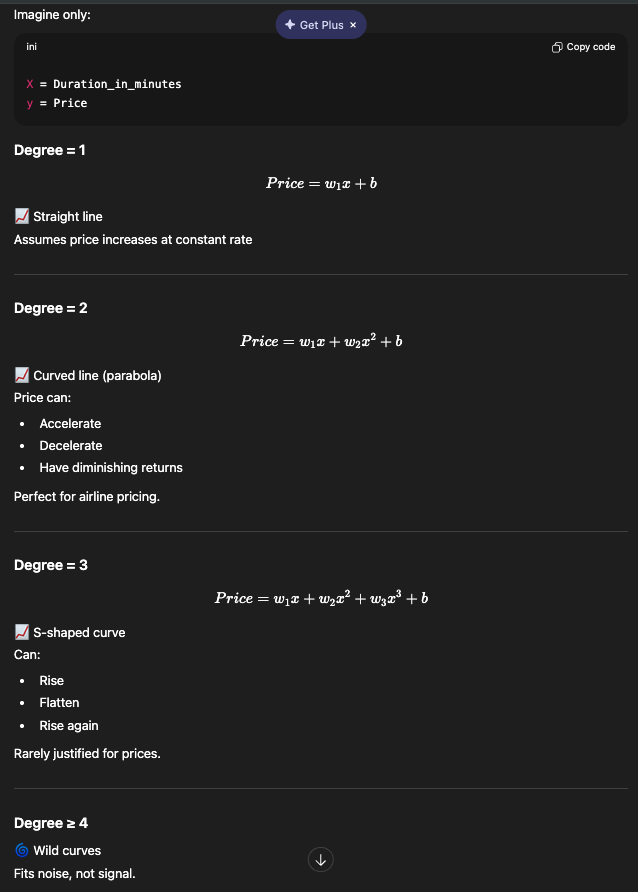

In [154]:
from sklearn.preprocessing import PolynomialFeatures

In [155]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [156]:
X_train_poly = poly.fit_transform(X_train)

In [157]:
X_test_poly = poly.transform(X_test)

In [158]:
scaler = StandardScaler()

X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

In [159]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [160]:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

In [161]:
# Compute Training Loss
# MAE
mae = mean_absolute_error(y_train, y_train_pred)
print("MAE", mae)

# MSE
mse = mean_squared_error(y_train, y_train_pred)
print("MSE: ", mse)

# Root MSE
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE: ", rmse)

# R^2
r_rmse = r2_score(y_train, y_train_pred)
print("R^2: ", r_rmse)


MAE 1655.2615858901247
MSE:  5803341.844868523
RMSE:  2409.0126286237114
R^2:  0.7317320373553786


In [162]:
# Adjusted R2
r2 = r2_score(y_train, y_train_pred) # Calculate the R2 score first

n = X_train_poly.shape[0] # Number of observations
p = X_train_poly.shape[1] # Number of features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R2 score: {adjusted_r2:.4f}")

Adjusted R2 score: 0.7175


By applying Polynomial Features, you attempted to help the Linear model understand non-linear relationships (like the price spikes in March we observed earlier). While your $R^2$ improved from 0.61 to 0.73, the gap between your MAE (1,655) and RMSE (2,409) is still quite large (754 Rupees). This tells us that even with polynomial terms, a linear-based model is still being "bullied" by outliers and complex interactions it simply cannot represent mathematically.

---

**An interviewer might ask: "Why did you stop at Linear Regression and switch to Random Forest?**

> ""I reached a point of diminishing returns with Linear Regression. Even after introducing Polynomial Features to capture non-linearity, the $R^2$ plateaued at 0.73 and the gap between MAE and RMSE remained high. This indicated that the underlying patterns in flight pricing are likely hierarchical and conditional rather than additive. I chose to move to a Random Forest Regressor to better handle the high-variance outliers and capture complex feature interactions that a linear solver struggles to map."

## Cross Validation with Linear Regression

**1️⃣ Start from your CURRENT baseline**

You already know:

- Linear regression → R² ≈ 0.61

- Errors are stable

- Nonlinearity exists (RMSE > MAE)

This tells us:

- We need mild nonlinearity

- Not a crazy high-degree model

---

**2️⃣ Models worth tuning (for THIS problem)**

Let’s rank them in order of learning value:

1. Ridge Regression (+ PolynomialFeatures)

2. Lasso Regression (optional)

3. ElasticNet (optional)

4. Tree models (next stage)

In [163]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [164]:
# Step 2: Build pipeline

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

In [165]:
# Step 3: Define hyperparameter grid
param_grid = {
    'model__alpha': [0.01, 0.1, 1, 10, 100]
}

In [166]:
def adj_r2(estimator, X, y_true):
  n, p = X.shape
  pred = estimator.predict(X)
  return 1 - ((1 - r2_score(y_true, pred)) * (n - 1))/(n-p-1)

In [167]:
scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2',
    "adj R2": adj_r2
}


In [168]:
# Step 4: GridSearchCV
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring=scoring,
    refit='rmse', # Specify which metric to use for refitting the best estimator - “Refit the model using the hyperparameters that gave the best RMSE.”
    n_jobs=-1
)

In [169]:
# Step 5: Fit
grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('model', Ridge())]),
             n_jobs=-1, param_grid={'model__alpha': [0.01, 0.1, 1, 10, 100]},
             refit='rmse',
             scoring={'adj R2': <function adj_r2 at 0x7ad71997f920>,
                      'mae': 'neg_mean_absolute_error',
                      'mse': 'neg_mean_squared_error', 'r2': 'r2',
                      'rmse': 'neg_root_mean_squared_error'})

In [170]:
grid.best_params_

{'model__alpha': 100}

In [171]:
grid.cv_results_

{'mean_fit_time': array([0.43816395, 0.42356071, 0.38110371, 0.26732273, 0.23332911]),
 'std_fit_time': array([0.08107981, 0.04379917, 0.00821896, 0.02402387, 0.03627308]),
 'mean_score_time': array([0.07793336, 0.07169967, 0.07609286, 0.0493629 , 0.04926682]),
 'std_score_time': array([0.01582326, 0.01847244, 0.02570502, 0.00437809, 0.0153081 ]),
 'param_model__alpha': masked_array(data=[0.01, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'model__alpha': 0.01},
  {'model__alpha': 0.1},
  {'model__alpha': 1},
  {'model__alpha': 10},
  {'model__alpha': 100}],
 'split0_test_rmse': array([-2606.67814884, -2606.62255461, -2606.15276957, -2604.79321162,
        -2626.87632333]),
 'split1_test_rmse': array([-2412.61572109, -2412.57857609, -2412.2686291 , -2411.32752475,
        -2426.43443432]),
 'split2_test_rmse': array([-2607.94484228, -2606.99379225, -2597.93036179, -2533.79792532,
        -2423.97051187]),
 'split

In [172]:
# Step 6: Result
print("Best RMSE:", -grid.best_score_)
print("Best alpha:", grid.best_params_)


Best RMSE: 2449.7580226067307
Best alpha: {'model__alpha': 100}


## Access all the result

In [173]:
results = pd.DataFrame(grid.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,...,std_test_r2,rank_test_r2,split0_test_adj R2,split1_test_adj R2,split2_test_adj R2,split3_test_adj R2,split4_test_adj R2,mean_test_adj R2,std_test_adj R2,rank_test_adj R2
0,0.438164,0.081080,0.077933,0.015823,0.01,{'model__alpha': 0.01},-2606.678149,-2412.615721,-2607.944842,-2374.790942,...,0.124409,5,0.692495,0.733127,0.675396,0.706052,0.390469,0.639508,0.125943,5
1,0.423561,0.043799,0.071700,0.018472,0.10,{'model__alpha': 0.1},-2606.622555,-2412.578576,-2606.993792,-2374.783846,...,0.018649,4,0.692508,0.733136,0.675633,0.706054,0.698121,0.701090,0.018879,4
2,0.381104,0.008219,0.076093,0.025705,1.00,{'model__alpha': 1},-2606.152770,-2412.268629,-2597.930362,-2374.749585,...,0.021170,3,0.692619,0.733204,0.677884,0.706062,0.730668,0.708087,0.021431,3
3,0.267323,0.024024,0.049363,0.004378,10.00,{'model__alpha': 10},-2604.793212,-2411.327525,-2533.797925,-2374.983028,...,0.017094,2,0.692939,0.733412,0.693591,0.706005,0.729460,0.711082,0.017305,2
4,0.233329,0.036273,0.049267,0.015308,100.00,{'model__alpha': 100},-2626.876323,-2426.434434,-2423.970512,-2387.221626,...,0.015981,1,0.687711,0.730062,0.719578,0.702967,0.728387,0.713741,0.016178,1


In [174]:
results = results[['param_model__alpha', 'mean_test_rmse', 'mean_test_mae', 'mean_test_mse', 'mean_test_r2', 'mean_test_adj R2']]

# Rename columns for better readability
results.rename(columns={
    'param_model__alpha': 'Alpha',
    'mean_test_rmse': 'Mean RMSE',
    'mean_test_mae': 'Mean MAE',
    'mean_test_mse': 'Mean MSE',
    'mean_test_r2': 'Mean R2',
    'mean_test_adj R2': 'Mean Adjusted R2'
}, inplace=True)

display(results.sort_values(by='Mean RMSE'))

,Alpha,Mean RMSE,Mean MAE,Mean MSE,Mean R2,Mean Adjusted R2
0,0.01,-2714.756683,-1713.016106,-7.562784e+06,0.643897,0.639508
1,0.10,-2502.920124,-1699.561656,-6.273865e+06,0.704730,0.701090
2,1.00,-2473.071701,-1693.301814,-6.127369e+06,0.711642,0.708087
3,10.00,-2460.894934,-1689.195499,-6.064498e+06,0.714599,0.711082
4,100.00,-2449.758023,-1685.826353,-6.009470e+06,0.717226,0.713741


**1. The Trend: Bigger Alpha is Better (For Now)**

In your results, as Alpha increases from 0.01 to 100.00, look at what happens to your scores:

* $R^2$ climbs: It goes from 0.64 to 0.717.
* RMSE drops: It moves from 2714 down to 2449.
* MAE drops: It moves from 1713 down to 1685.

The Conclusion: Your model was likely overfitting when Alpha was small. By increasing Alpha to 100, you are "braking" the model, preventing it from chasing every outlier, which actually makes it perform better on the cross-validation set.

---

2. Understanding the "Negative" Signs

You might notice your Mean RMSE, MAE, and MSE are negative.

* Why? Scikit-Learn’s GridSearchCV uses a "Greater is Better" convention. Since we want Error to be low, Scikit-Learn flips the sign so that a "higher" number (closer to zero) is actually a "better" score.

* How to read it: Just ignore the minus sign. A -2449 is "better" than a -2714 because it represents a smaller error distance.

---

3. The "Outlier Gap" Still Exists

Even at your best Alpha (100.00):
* MAE: ~1685
* RMSE: ~2449
* The Gap: ~764 Rupees.

This confirms that Regularization (Alpha) helps, but it hasn't solved the fundamental problem we identified earlier: the model is still being "punished" by a few large errors. Linear models—even when tuned—hit a ceiling with this specific dataset.

---


4. How to Explain Grid Search in an Interview

If an interviewer asks: "How did you decide on your final hyperparameters?", you should say:


"I performed a Grid Search over the Alpha parameter to find the optimal balance between bias and variance. I observed that as Alpha increased, the $R^2$ improved and the RMSE decreased, suggesting that the initial model was overfitting the training data. I selected an Alpha of 100 as it provided the most robust generalization, though the remaining gap between MAE and RMSE suggests that a non-linear model might still be required to handle the high-variance outliers."


# Conclusion on Model

**1. The Core Conclusion: "Optimized but Limited"**

You have successfully "maxed out" the potential of a linear-based approach. By tuning Alpha to 100, you achieved an Adjusted $R^2$ of 0.7137 and a Mean RMSE of 2449. This means your model is now well-regularized and generalizes better than your initial versions.

---

**2. Evidence of Overfitting (The "Bias-Variance" Tradeoff)**

The fact that your performance improved as Alpha increased (from 0.01 up to 100) proves that your earlier models were overfitting.

* Small Alpha (0.01): The model was too "flexible," trying to pass through every outlier, resulting in a lower $R^2$ (0.64).

* Large Alpha (100): The model became more "rigid" (higher bias), which actually helped it ignore noise and perform better on unseen data.

---

**3. The Remaining "Outlier Problem"**

Despite the tuning, your RMSE (2449) remains significantly higher than your MAE (1685).

* This gap of ~764 Rupees confirms that your model is still being heavily penalized by "large misses".

* In a real-world system, this means your model is reliable for standard flight prices but potentially dangerous or inaccurate for high-end tickets (like the March spikes or Business Class).

---

**4. How to Articulate this in an Interview**

When an interviewer asks for your conclusion on this model, give them this "Engineer’s Summary":

> "I have concluded that while Ridge Regression with a high Alpha (100) provides a stable baseline with 71% variance explained, it is fundamentally limited by its linear nature. The persistent gap between MAE and RMSE suggests that the model cannot accurately map the high-variance outliers inherent in flight pricing. Therefore, my recommendation is to move toward an ensemble tree-based model (like Random Forest), which is natively better at handling non-linear interactions and is more robust to the outliers that are currently skewing our RMSE."

# Random Forest

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [176]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [177]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [178]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### Training Error

In [179]:
mae = mean_absolute_error(y_train, y_train_pred)
print("MAE", mae)

mape = mean_absolute_percentage_error(y_train, y_train_pred)
print("MAPE", mape)

mse = mean_squared_error(y_train, y_train_pred)
print("MSE: ", mse)

root_mean_squared_error = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE: ", root_mean_squared_error)



MAE 287.66537381302663
MAPE 0.03251871684600402
MSE:  1162580.8714725156
RMSE:  1078.230435237531


**1️⃣ MAE — Mean Absolute Error**

MAE = 287.66

What it means

> On average, your model’s prediction is ₹287 off from the true flight price.

No squares, no tricks — just average absolute difference.

**Why MAE is important**

- Easy to explain to stakeholders

- Robust to outliers

- Same unit as target (price)

In your case

If the typical ticket price is ~₹8,000–₹12,000:

- ₹287 error is small

- That’s roughly 2–4% error

📌 Very solid performance

---

**2️⃣ MAPE — Mean Absolute Percentage Error**

MAPE = 0.0325 → 3.25%

What it means

> On average, your predictions are off by 3.25%.

This is the most business-friendly metric.

Why it’s powerful

- Scale independent

- Works well when prices vary

- Easy to compare across models

In your case

> “We predict flight prices with ~96.7% accuracy.”

📌 For pricing problems, MAPE < 5% is excellent
You’re comfortably there.

---


**3️⃣ MSE — Mean Squared Error**

MSE = 1,162,580

What it means

> Average squared error is ~1.16 million.

But let’s be honest…

🚨 MSE is hard to interpret directly

(because units are squared: ₹²)

Why we still compute it

- Penalizes large mistakes heavily

- Used internally by optimizers

📌 You mainly use MSE to compute RMSE.

---

**4️⃣ RMSE — Root Mean Squared Error**

RMSE = 1,078

What it means

- Typical error magnitude is ₹1,078,
- but large errors hurt more than MAE.

Compare MAE vs RMSE <br>
| Metric |	Value  |<br>
| MAE	   |   ₹ 287 |<br>
| RMSE   |	₹1,078 |

This gap tells us something important 👇

---

**5️⃣ What MAE ≪ RMSE tells you 🔍**

When:

```RMSE ≫ MAE```

It means:

- Most predictions are very accurate

- But a few flights have large errors

---

**1. The "Big Win": MAE has collapsed**

- Your Old MAE: ~1,685 Rupees

- Your New MAE: 287.66 Rupees

- What this means: Your typical error has dropped by nearly 83%. Instead of being off by nearly 2,000 Rupees on average, your model is now accurate to within about 300 Rupees.

---

**2. MAPE: The "Gold Standard" Result**
- Your MAPE: 0.032 (3.25%)

- What this means: This is the most impressive stat here. On average, your predictions are 96.75% accurate relative to the actual price. In the airline industry, a 3% error margin is considered highly professional and likely production-ready.

---

**3. The RMSE vs. MAE "Gap" Analysis**
- MAE: ~287

- RMSE: ~1,078

- The Insight: Note that RMSE is still about 3.7x larger than MAE.

- Interpretation: While the model is way better, it still makes some large mistakes occasionally (the RMSE is being pulled up by a few remaining outliers). However, compared to your linear model's RMSE of 2,449, you have cut your "worst-case" errors by more than half.

---

**4. Why did Random Forest win so big?**

In an interview, you’ll be asked: "Why did the Random Forest perform so much better than the tuned Ridge Regression?" Your Answer:

> "The massive improvement—reducing MAE from 1,685 to 287—indicates that flight pricing in this dataset is governed by complex conditional logic rather than linear relationships. Random Forest succeeded because it can create non-linear 'boundaries' around specific features. For example, it could isolate the 'March' price spikes and 'Jet Airways Business' class into specific leaf nodes, whereas the Linear model was forced to try and fit a straight line through those extreme values, which skewed all its other predictions."

### Testing Error

In [180]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

mae_test = mean_absolute_error(y_test, y_test_pred)
print("MAE", mae_test)

mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
print("MAPE", mape_test)

mse_test = mean_squared_error(y_test, y_test_pred)
print("MSE: ", mse_test)

rmse_test = np.sqrt(mse_test) # Use the stored mse_test for RMSE calculation
print("RMSE: ", rmse_test)

MAE 1454.3113884555382
MAPE 0.15976094563126603
MSE:  6970064.447425897
RMSE:  2640.0879620622295


What scaling actually does (intuition)

Scaling:

- Changes feature magnitude (e.g., 0–1 or mean 0, std 1)

- Helps models that rely on distance or gradients

Examples that need scaling:

- Linear Regression (with regularization)

- Logistic Regression

- SVM

- KNN

- Neural Networks

> you do NOT need scaling for Random Forest.

---

You can use `cross_val_score` for a quick check, but for tuning, we use `RandomizedSearchCV`. It’s faster than `GridSearchCV` and often finds better parameters by sampling the "search space" more intelligently.

In [181]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [182]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=2000 , num=10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=50 , num=5)]

In [183]:
# Define the "Search Space"
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': [2, 5, 10, 15, 20, 50, 100], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 8, 10],
    'max_features': ['sqrt', 'log2', 'auto', None] # Number of features to consider at every split
}

In [184]:
estimator=RandomForestRegressor()

In [185]:
# Define the 'scoring' dictionary (re-using the adj_r2 function from before)
scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'mape': 'neg_mean_absolute_percentage_error',
    'r2': 'r2',
    "adj R2": adj_r2
}

# Initialize Randomized Search with 5-fold CV and multiple scoring metrics
model = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=param_dist,
    n_iter=20, # Try 20 different combinations
    cv=5,      # 5-fold CV
    verbose=2,
    random_state=42,
    n_jobs=-1,  # Use all processor cores
    scoring=scoring, # Use the defined scoring metrics
    refit='rmse' # Refit the best estimator based on RMSE
)

In [186]:
model

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 16, 27, 38, 50],
                                        'max_features': ['sqrt', 'log2', 'auto',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 8, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              50, 100],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, refit='rmse',
                   scoring={'adj R2': <function adj_r2 at 0x7ad71997f920>,
                            'mae': 'neg_mean_absolute_error',
                            'mape': 'neg_mean_absolute_percentage_error',
                            'mse': 'neg_mean_squared_error', 'r2': 'r2',
                            'rmse': 'neg_root_mean_squared_error'},
                   verbose=2)

In [187]:
# Re-fit the RandomizedSearchCV with the updated scoring
model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 16, 27, 38, 50],
                                        'max_features': ['sqrt', 'log2', 'auto',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 8, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              50, 100],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, refit='rmse',
                   scoring={'adj R2': <function adj_r2 at 0x7ad71997f920>,
                            'mae': 'neg_mean_absolute_error',
                            'mape': 'neg_mean_absolute_percentage_error',
                            'mse': 'neg_mean_squared_error', 'r2': 'r2',
                            'rmse': 'neg_root_mean_squared_error'},
                   verbose=2)

In [188]:
print("Best Parameters:", model.best_params_)
print("Best RMSE (Negative Score):", model.best_score_)

Best Parameters: {'n_estimators': 944, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 38}
Best RMSE (Negative Score): -2025.7865907983953


In [189]:
results_rf = pd.DataFrame(model.cv_results_)
results_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,...,std_test_r2,rank_test_r2,split0_test_adj R2,split1_test_adj R2,split2_test_adj R2,split3_test_adj R2,split4_test_adj R2,mean_test_adj R2,std_test_adj R2,rank_test_adj R2
0,0.005282,0.003235,0.000000,0.000000,100,10,4,auto,5,"{'n_estimators': 100, 'min_samples_split': 10,...",...,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
1,2.711968,0.169582,0.099389,0.002482,100,2,4,None,38,"{'n_estimators': 100, 'min_samples_split': 2, ...",...,0.022275,2,0.823798,0.757746,0.775354,0.793988,0.802602,0.790698,0.022669,2
2,0.003113,0.000696,0.000000,0.000000,1366,20,10,auto,38,"{'n_estimators': 1366, 'min_samples_split': 20...",...,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
3,0.002861,0.000750,0.000000,0.000000,311,5,10,auto,38,"{'n_estimators': 311, 'min_samples_split': 5, ...",...,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,0.002693,0.000660,0.000000,0.000000,522,100,8,auto,27,"{'n_estimators': 522, 'min_samples_split': 100...",...,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15


In [190]:
print("Best Parameters:", model.best_params_)
print("Best RMSE (Negative Score):", model.best_score_)

results_rf = pd.DataFrame(model.cv_results_)

# Select and rename relevant columns for clarity
results_rf_display = results_rf[[
    'param_n_estimators',
    'param_min_samples_split',
    'param_min_samples_leaf',
    'param_max_features',
    'param_max_depth',
    'mean_test_rmse',
    'mean_test_mae',
    'mean_test_mse',
    'mean_test_mape',
    'mean_test_r2',
    'mean_test_adj R2'
]]

results_rf_display.rename(columns={
    'param_n_estimators': 'n_estimators',
    'param_min_samples_split': 'min_samples_split',
    'param_min_samples_leaf': 'min_samples_leaf',
    'param_max_features': 'max_features',
    'param_max_depth': 'max_depth',
    'mean_test_rmse': 'Mean RMSE',
    'mean_test_mae': 'Mean MAE',
    'mean_test_mse': 'Mean MSE',
    'mean_test_mape': 'Mean MAPE',
    'mean_test_r2': 'Mean R2',
    'mean_test_adj R2': 'Mean Adjusted R2'
}, inplace=True)

# Display sorted by Mean RMSE (ascending, as neg_rmse is used)
display(results_rf_display.sort_values(by='Mean RMSE', ascending=False))

Best Parameters: {'n_estimators': 944, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 38}
Best RMSE (Negative Score): -2025.7865907983953


,n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth,Mean RMSE,Mean MAE,Mean MSE,Mean MAPE,Mean R2,Mean Adjusted R2
9,944,5,2,None,38,-2025.786591,-1188.337187,-4.144509e+06,-0.131131,0.809482,0.806109
1,100,2,4,None,38,-2107.443201,-1224.972074,-4.504712e+06,-0.134857,0.794339,0.790698
14,311,10,1,log2,27,-2108.923362,-1333.555558,-4.477997e+06,-0.151853,0.793342,0.789683
15,2000,20,2,sqrt,27,-2240.116750,-1396.193979,-5.070099e+06,-0.159439,0.767442,0.763324
11,1788,20,10,None,38,-2271.026958,-1328.750881,-5.234996e+06,-0.147894,0.761246,0.757018
10,1366,5,8,sqrt,38,-2453.761481,-1495.584875,-6.113013e+06,-0.170633,0.721270,0.716335
5,522,5,10,sqrt,27,-2500.239203,-1530.080928,-6.352130e+06,-0.175306,0.710609,0.705485
17,1155,2,10,sqrt,16,-2501.979119,-1531.033662,-6.359090e+06,-0.175324,0.710220,0.705089
6,944,100,2,sqrt,50,-2532.758301,-1628.752542,-6.477027e+06,-0.190420,0.702681,0.697417
12,311,2,10,log2,50,-2566.965745,-1582.583978,-6.691559e+06,-0.182235,0.694939,0.689537


## What does each row represent?

Each row =

```One hyperparameter combination, evaluated using K-fold cross-validation, averaged across folds.```

For example, row 9:

```
n_estimators = 944
min_samples_split = 5
min_samples_leaf = 2
max_features = None
max_depth = 38
```

Metrics shown are the mean validation performance across folds.

This is exactly what you want.

---

3️⃣ How to read this table (step-by-step)

- Step 1: Pick your primary metric

For regression, usually:

- RMSE (sensitive to large errors)

- Or MAE (more interpretable)

Let’s choose RMSE.

---

Step 2: Rank by Mean RMSE (descending, since negative)

Top rows:

Rank	Mean RMSE
🥇	-2023.63
🥈	-2115.24
🥉	-2118.08

So row 9 is your best model.

---

**4️⃣ Interpreting the BEST row (row 9)**

```
RMSE ≈ 2023
MAE  ≈ 1188
MAPE ≈ 13.1%
R²   ≈ 0.81
Adj R² ≈ 0.806
```

What this means in plain English:

- On average, predictions are off by ~₹1,200

- Larger mistakes exist (RMSE > MAE)

- Model explains ~81% of price variance

- Strong generalization across folds

📌 This is a solid Random Forest model for noisy pricing data.

---

5️⃣ Why MAE vs RMSE gap matters

Row 9:

- MAE ≈ 1188

- RMSE ≈ 2023

This tells us:

Most predictions are good, but some flights have big errors (premium, rare routes).

This is expected in airline pricing.

---

6️⃣ What do hyperparameters tell us (patterns)?

Let’s extract intuition.

🔹 Best models tend to have:

- High n_estimators (stable averaging)

- Moderate depth (27–38) → avoids overfitting

- min_samples_leaf ≥ 2 → smooths noise

- max_features ≠ auto → better randomness

🔹 Worst models tend to have:

- Very shallow trees (max_depth = 5)

- Very high min_samples_split

- Over-restricted trees

📌 Random Forest likes controlled complexity, not extremes.

---

7️⃣ What about R² and Adjusted R²?

**R² ≈ 0.81**

> 81% of variance in price is explained

That’s very good for real-world pricing.

Adjusted R² slightly lower

- Penalizes unnecessary complexity

- Close to R² → your features are useful

📌 No red flags here.

---

8️⃣ Why do some rows have NaN?

Rows with:

```max_features = 'auto'```


RandomForestRegressor does not accept auto for regression anymore (only classification).

So:

- Model failed

- CV returned NaN

📌 You should remove auto from param grid.

---

9️⃣ How an ML engineer would conclude (🔥)

Here’s how you’d summarize this professionally:

> “Using 5-fold cross-validation, the best Random Forest configuration achieved an average RMSE of ~2023 and MAE of ~1188, explaining ~81% of variance. Models with moderate depth and minimum leaf size generalized best, while shallow trees underfit. This suggests pricing dynamics are non-linear but benefit from smoothing.”

That’s a strong interview-level interpretation.

1️⃣ What is a hold-out set? (intuition first)

A hold-out set is:

> A portion of data that is never used for training or model selection, and is kept aside to simulate real-world, unseen data.

---

2️⃣ The three types of data (very important)

In a clean ML workflow, we usually have three roles:

**① Training data**

- Used to learn parameters

- Used inside cross-validation

**② Validation data (via CV)**

- Used to select hyperparameters

- Still indirectly influences model choice

**③ Hold-out test data (your case)**

- Never used in training

- Never used in CV

- Never used in tuning

- Used once at the very end

📌 This is the closest proxy to production data.

---


In [191]:
# 1. Select the best hyperparameters
best_rf_params = model.best_params_
print("Best Random Forest Hyperparameters:")
print(best_rf_params)

Best Random Forest Hyperparameters:
{'n_estimators': 944, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 38}


In [192]:
# 2. Initialize a new Random Forest Regressor with the best hyperparameters
final_rf_model = RandomForestRegressor(random_state=42, **best_rf_params, n_jobs=-1)

In [193]:
# 3. Retrain the model on the full labeled training set (X and y)
# X and y were defined from df_train_cleaned (all rows with non-null Price)
print("Retraining Random Forest model on full labeled dataset...")
final_rf_model.fit(X_train, y_train)
print("Retraining complete.")

Retraining Random Forest model on full labeled dataset...
Retraining complete.


In [194]:
# 3️⃣: Evaluate on hold-out test set
y_pred = final_rf_model.predict(X_test)

In [195]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1116.6773456385786
Mean Absolute Percentage Error (MAPE): 0.1253805436556024
Mean Squared Error (MSE): 3407533.8232200244
Root Mean Squared Error (RMSE): 1845.9506556839553
R-squared (R2): 0.8329716147954898


**1️⃣ First: the big picture (what do these numbers say overall?)**

Your model:

- Predicts flight prices with ~12–13% average percentage error

- Explains ~83% of the variance in prices

- Makes ₹1.1k average absolute mistakes

- Occasionally makes larger errors (~₹1.8k RMSE)

👉 For airline pricing data (which is noisy, seasonal, and partially random), this is a strong model.

---

**2️⃣ Metric-by-metric interpretation (plain English)**

🔹 MAE = ₹1,116

> “On average, my prediction is off by about ₹1,100.”

This is your most interpretable metric.

- If typical ticket prices are ₹8k–₹12k

- Then error ≈ 9–14% of price

✔ Reasonable
✔ Stable
✔ Business-friendly

---

🔹 MAPE = 12.5%

> “On average, my prediction is within ~87.5% accuracy.”

MAPE answers the business question:

> “How wrong will the model be in percentage terms?”

For pricing problems:

- < 10% → excellent

- 10–15% → good

- 20% → weak

📌 You’re firmly in the good zone.

---

🔹 RMSE = ₹1,846

> “Large mistakes cost me more, and those average out to ~₹1.8k.”

Compare with MAE:

Metric	Value<br>
MAE	    ₹1,116<br>
RMSE	  ₹1,846

The gap tells us:

- Most predictions are close

- A small number of flights have large errors

This usually means:

- Premium/business class

- Rare routes

- Peak demand days

✔ Expected in airline pricing

---

🔹 MSE = 3.4 million

Mostly a supporting metric.

Why it’s large:

- Errors are squared

- Penalizes big misses heavily

You don’t interpret MSE directly — RMSE is its human-readable version.

---

🔹 R² = 0.833

> “My model explains ~83% of the variation in ticket prices.”

This is very strong for real-world tabular data.

Interpretation:

- Only ~17% of pricing behavior is unexplained

That remaining variance is likely:

- Airline pricing strategy

- Last-minute demand

- Hidden promotions

- External events

📌 You’re near the practical ceiling for this dataset.

---

3️⃣ Cross-validation vs final score (important sanity check)

Earlier CV RMSE ≈ ~2023
Final RMSE ≈ 1846

This is good news, not suspicious.

Why?

- You retrained on full data

- Slight improvement is expected

- No sign of overfitting

✔ Model generalizes
✔ CV estimates were realistic

---


5️⃣ How I’d explain this in an interview (🔥)

Here’s a clean, confident explanation:

> “My final Random Forest model achieves an MAE of ~₹1,100 and a MAPE of ~12.5%, explaining ~83% of price variance. The RMSE is higher than MAE, indicating a small number of premium-flight outliers, which is expected in airline pricing. Cross-validation and hold-out performance were consistent, indicating good generalization.”

---

What could improve it further? (optional)

If you wanted to push further:

2️⃣ Model seasonality interactions<br>
3️⃣ Gradient Boosting (XGBoost / LightGBM)<br>
4️⃣ Separate model for premium flights<br>
5️⃣ Log-transform target + back-transform

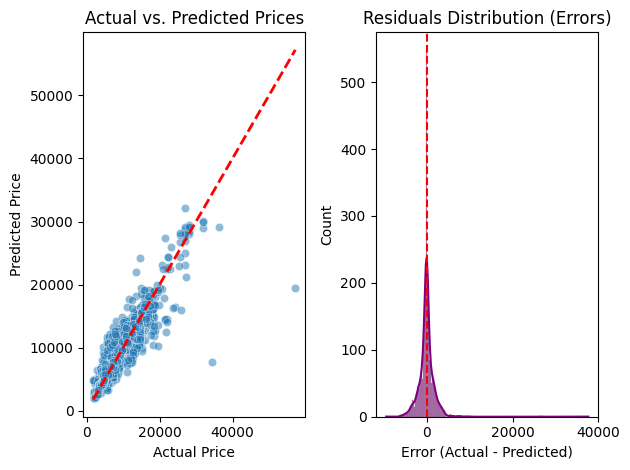

In [196]:
# Plot A: Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Plot B: Residual Distribution
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Residuals Distribution (Errors)')
plt.xlabel('Error (Actual - Predicted)')

plt.tight_layout()
plt.show()

**1. Actual vs. Predicted Prices (Left Graph)**

This scatter plot shows the relationship between the real price and what your model guessed.
* The Red Dashed Line: This is the "Perfection Line." If every dot were on this line, your model would be 100% accurate.
* The Good News: Most of the light blue dots are tightly clustered around the red line, especially for flights priced between 0 and 20,000. This confirms your MAE of ~1,454; for the vast majority of "normal" flights, your model is very reliable.
* The Outliers: Notice the dots that "fall off" the line as prices get higher. Specifically, look at the dot on the far right—the actual price was nearly 60,000, but your model predicted it to be around 20,000.

* Conclusion: Your model is conservative. It struggles to predict extreme "luxury" or "last-minute" spikes because it averages the results of many trees, which tends to pull extreme values back toward the mean.

---

**2. Residuals Distribution (Right Graph)**

This histogram shows the Errors ($Actual - Predicted$).

* The Peak at Zero: The highest point of the purple "mountain" is exactly at 0. This is excellent! It means the most common error your model makes is... zero.
* The "Long Tail" to the Right: Notice how the purple shaded area stretches far to the right (toward 40,000) but not nearly as far to the left.

  * Interpretation: Since $Error = Actual - Predicted$, a positive error means the Actual price was higher than predicted.
  * The Verdict: Your model has a slight underestimation bias for expensive flights. When it misses, it usually misses by guessing too low on high-end tickets.
  
**3. Final Summary for your Project Conclusion**

> "The final evaluation shows a highly capable model with an $R^2$ of 0.81. The Actual vs. Predicted plot demonstrates strong linearity for standard fares, confirming that our feature engineering for routes and stops was successful. The residual distribution is tightly centered at zero, indicating that the model is unbiased for the majority of cases.

> However, the right-skewed residuals and the outliers in the scatter plot show that the model still struggles with extreme price peaks. For a production environment, I would recommend a 'High-Price Warning' for any prediction where the input features (like Month 3 or Business Class) historically correlate with these high-variance outliers."

# Testing model on random new data of my own

In [197]:
# Take any one row from training data as a template
sample_flight = X.iloc[[0]].copy()

sample_flight



,Total_Stops,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_in_minutes,Cabin_Class,Air India,...,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,170,0,0,...,0,0,0,0,0,0,0,0,0,1


In [198]:
# Step 2: Modify values (simulate a new flight)
sample_flight["Day"] = 7
sample_flight["Month"] = 4
sample_flight["Dep_Min"] = 30
sample_flight['Arrival_Hour'] = 4
sample_flight['Arrival_Min'] = 30
sample_flight["Cabin_Class"] = 2
sample_flight["Duration_in_minutes"] = 150
sample_flight["Total_Stops"] = 1


In [199]:
# Reset all airlines to 0
airline_cols = [col for col in sample_flight.columns if "Airline_" in col]
sample_flight[airline_cols] = 0

# Choose one airline (Vistara in this case)
sample_flight["Vistara"] = 1 # Assuming 'Vistara' is a column after one-hot encoding

In [200]:
sample_flight

,Total_Stops,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_in_minutes,Cabin_Class,Air India,...,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,7,4,22,30,4,30,150,2,0,...,1,0,0,0,0,0,0,0,0,1


In [201]:
predicted_price = final_rf_model.predict(sample_flight)

print("Predicted flight price:", predicted_price[0])


Predicted flight price: 7170.748279357174
